# Build a model that classifies the side effects of a drug

In this internship, I am going to build a classification model that effectively classifies the side effects of a drug

The dataset is taken from Kaggle. The link to the dataset is : https://www.kaggle.com/datasets/rohanharode07/webmd-drug-reviews-dataset

## Importing the necessary libraries 

In [1]:
from faker import Faker
#loading the dataset
import numpy as np
import pandas as pd
from random import choice, sample
##Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load the dataset using Pandas


In [2]:
data = pd.read_csv(r"C:\Users\sruth\OneDrive\Desktop\internshipdsa\webmd.csv")

In [3]:
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
#pd.set_option('display.width', None)

In [4]:
data.head(50)

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1
5,55-64,Other,7/19/2008,warfarin (bulk) 100 % powder,144731,4,4,help heart condition operation well,4,Male,,0
6,25-34,Birth Control,6/15/2017,wymzya fe,163180,5,5,Haven't gotten pregnant so it does it's job. I...,2,Female,"Nausea , vomiting , headache , bloating , ...",0
7,45-54,Disease of Ovaries with Cysts,1/30/2017,wymzya fe,163180,5,5,I have take this for 5 years age 45-50 to prev...,5,Female,"Nausea , vomiting , headache , bloating , ...",0
8,25-34,Acne,4/27/2016,wymzya fe,163180,4,2,,2,Female,"Nausea , vomiting , headache , bloating , ...",1
9,55-64,Stuffy Nose,10/29/2012,"12 hour nasal relief spray, non-aerosol",9800,4,2,The 12 hour spray only works for me for 6 hours.,2,Male,"Temporary burning, stinging, dryness in the no...",0


## Description of the Features

The dataset contains the following columns:

## About the Dataset

In [5]:
# number of rows and columns
data.shape

(362806, 12)

In [6]:
#data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            362806 non-null  object
 1   Condition      362806 non-null  object
 2   Date           362806 non-null  object
 3   Drug           362806 non-null  object
 4   DrugId         362806 non-null  int64 
 5   EaseofUse      362806 non-null  int64 
 6   Effectiveness  362806 non-null  int64 
 7   Reviews        362769 non-null  object
 8   Satisfaction   362806 non-null  int64 
 9   Sex            362806 non-null  object
 10  Sides          362806 non-null  object
 11  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 33.2+ MB


In [7]:
##Statistical description of the data
data.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,362806.000000,362806.000000,362806.000000,362806.000000,362806.000000
mean,36879.370774,4.019829,3.532061,3.135408,6.744916
std,52624.412971,1.317711,1.455961,1.611106,9.324240
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4896.000000,3.000000,3.000000,1.000000,1.000000
50%,9548.000000,5.000000,4.000000,3.000000,4.000000
75%,63522.000000,5.000000,5.000000,5.000000,9.000000
max,178546.000000,10.000000,10.000000,10.000000,255.000000


In [8]:
data.describe(include = object)

,Age,Condition,Date,Drug,Reviews,Sex,Sides
count,362806,362806,362806,362806,362769,362806,362806
unique,12,1806,4524,7093,250167,3,1651
top,45-54,Other,10/29/2007,cymbalta,,Female,
freq,80043,49765,404,4648,41824,238226,17460


In [9]:
data.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


In [10]:
data.tail()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
362801,55-64,Stop Smoking,11/14/2008,chantix,144470,5,5,I took the whole 12 weeks.I could have stopped...,5,Female,"Nausea , headache , vomiting , drowsiness, g...",2
362802,,Other,11/14/2008,chantix,144470,2,3,My dad strated taking Chantix about 1 month ag...,1,,"Nausea , headache , vomiting , drowsiness, g...",16
362803,25-34,Stop Smoking,11/13/2008,chantix,144470,2,4,"As long as I was on chantix, I didn't smoke. ...",2,Female,"Nausea , headache , vomiting , drowsiness, g...",3
362804,55-64,Stop Smoking,11/13/2008,chantix,144470,5,5,Started this medication Oct 5th 2008. Haven't ...,5,Male,"Nausea , headache , vomiting , drowsiness, g...",1
362805,45-54,Stop Smoking,11/12/2008,chantix,144470,4,5,"One year ago, I tried Chantix and had to stop ...",5,Female,"Nausea , headache , vomiting , drowsiness, g...",3


In [11]:
#missing values
data.isna().sum()

Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          37
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
dtype: int64

In [12]:
import random

In [13]:
fake=Faker()

In [14]:
races = ['Asian', 'White', 'African_American', 'Hispanic', 'American_Indian']

In [15]:
# Generate fake "Name" and "Race" columns
num_rows = len(data)
fake_names = [fake.name() for _ in range(num_rows)]
races = ['White', 'Black', 'Asian', 'Hispanic', 'Other']
fake_races = [random.choice(races) for _ in range(num_rows)]

In [16]:
# Add the "Name" and "Race" columns as the first and second columns
data.insert(0, 'Name', fake_names)
data.insert(1, 'Race', fake_races)


In [17]:
#data['Name'] = [fake.name() for _ in range(len(data))]
#data['Race'] = [random.choice(races) for _ in range(len(data))]

In [18]:
data.head(10)

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,William Johnson,Asian,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,Alejandro Williams,Black,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,David Cochran,Other,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,Danielle Fowler,White,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,Noah Robertson,Black,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1
5,Laura Wyatt,Asian,55-64,Other,7/19/2008,warfarin (bulk) 100 % powder,144731,4,4,help heart condition operation well,4,Male,,0
6,Hannah Velez,Hispanic,25-34,Birth Control,6/15/2017,wymzya fe,163180,5,5,Haven't gotten pregnant so it does it's job. I...,2,Female,"Nausea , vomiting , headache , bloating , ...",0
7,Alexis Johnston,White,45-54,Disease of Ovaries with Cysts,1/30/2017,wymzya fe,163180,5,5,I have take this for 5 years age 45-50 to prev...,5,Female,"Nausea , vomiting , headache , bloating , ...",0
8,Alisha Rodriguez,Black,25-34,Acne,4/27/2016,wymzya fe,163180,4,2,,2,Female,"Nausea , vomiting , headache , bloating , ...",1
9,Jay Fuller,Asian,55-64,Stuffy Nose,10/29/2012,"12 hour nasal relief spray, non-aerosol",9800,4,2,The 12 hour spray only works for me for 6 hours.,2,Male,"Temporary burning, stinging, dryness in the no...",0


In [19]:
data.columns

Index(['Name', 'Race', 'Age', 'Condition', 'Date', 'Drug', 'DrugId',
       'EaseofUse', 'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount'],
      dtype='object')

In [20]:
data.shape

(362806, 14)

In [21]:
data.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,362806.000000,362806.000000,362806.000000,362806.000000,362806.000000
mean,36879.370774,4.019829,3.532061,3.135408,6.744916
std,52624.412971,1.317711,1.455961,1.611106,9.324240
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4896.000000,3.000000,3.000000,1.000000,1.000000
50%,9548.000000,5.000000,4.000000,3.000000,4.000000
75%,63522.000000,5.000000,5.000000,5.000000,9.000000
max,178546.000000,10.000000,10.000000,10.000000,255.000000


In [22]:
data.describe(include = object)

,Name,Race,Age,Condition,Date,Drug,Reviews,Sex,Sides
count,362806,362806,362806,362806,362806,362806,362769,362806,362806
unique,180458,5,12,1806,4524,7093,250167,3,1651
top,Michael Smith,White,45-54,Other,10/29/2007,cymbalta,,Female,
freq,157,73066,80043,49765,404,4648,41824,238226,17460


### Unique values

In [23]:
data['Age'].unique()

array(['75 or over', '25-34', '65-74', '35-44', '55-64', '45-54', '19-24',
       ' ', '13-18', '7-12', '0-2', '3-6'], dtype=object)

In [24]:
data['Condition'].unique()

array(['Stuffy Nose', 'Cold Symptoms', 'Other', ...,
       'Combative and Explosive Behavior', 'Lead Poisoning',
       'Poisoning from Swallowed Unknown Substance'], dtype=object)

In [25]:
data['Date'].unique()

array(['9/21/2014', '1/13/2011', '7/16/2012', ..., '10/25/2019',
       '6/22/2019', '10/19/2019'], dtype=object)

In [26]:
data['Drug'].unique()

array(['25dph-7.5peh', 'warfarin (bulk) 100 % powder', 'wymzya fe', ...,
       'chest congestion relief dm', 'chantix', 'chateal'], dtype=object)

In [27]:
data['DrugId'].unique()

array([146724, 144731, 163180, ...,  94947, 144470, 163265], dtype=int64)

In [28]:
data['EaseofUse'].unique()

array([ 5,  2,  1,  4,  3,  6, 10], dtype=int64)

In [29]:
data['Effectiveness'].unique()

array([ 5,  3,  2,  1,  4,  6, 10], dtype=int64)

In [30]:
data['Reviews'].unique()

array(["I'm a retired physician and of all the meds I have tried for my allergies (seasonal and not) - this one is the most effective for me.  When I first began using this drug some years ago - tiredness as a problem but is not currently.",
       'cleared me right up even with my throat hurting it went away after taking the medicine',
       'why did my PTINR go from a normal of 2.5 to over \n100?', ...,
       "As long as I was on chantix, I didn't smoke.  Terrible stomach upset after each dose, constipation, headaches constantly, crazy dreams and mood swings.  I have had to stop taking it and have found other ways to stop smoking.",
       "Started this medication Oct 5th 2008. Haven't smoked for 6 weeks and planning on the full 12 weeks program.  I have had some problems like getting sick after the meds but accually it helps because everytime I see a smoker or smell smoke I get sick, still want one but it offsets it.",
       "One year ago, I tried Chantix and had to stop taking i

In [31]:
data['Satisfaction'].unique()

array([ 5,  3,  1,  4,  2,  6, 10], dtype=int64)

In [32]:
data['Sex'].unique()

array(['Male', 'Female', ' '], dtype=object)

In [33]:
data['Sides'].unique()

array(['Drowsiness,  dizziness ,  dry mouth /nose/throat,  headache ,  upset stomach ,  constipation , or  trouble sleeping  may occur.',
       ' ',
       'Nausea ,  vomiting ,  headache ,  bloating ,  breast  tenderness, swelling of the  ankles /feet (fluid retention), or  weight  change may occur.',
       ...,
       'Drowsiness,  dizziness ,  nausea ,  constipation ,  blurred vision , or  headache  may occur.',
       'Drowsiness,  dizziness ,  dry mouth ,  blurred vision ,  constipation ,  bloating , trouble urinating, and  weight  gain may occur.',
       'Diarrhea ,  nausea , or  heartburn  may occur.'], dtype=object)

In [34]:
data['UsefulCount'].unique()

array([  0,   1,   3,  10,   5,   4,   2,   7,   6,  12,  15,   9,  14,
        13,  18,  29,  17,   8,  30,  20,  16,  25,  19,  11,  23,  38,
        44,  34,  35,  21,  42,  28,  36,  40,  60,  48,  61,  50,  43,
        26,  22,  41,  54,  24,  33,  27,  45,  59,  75,  77,  66,  31,
        47,  32,  90,  84,  39,  55, 137,  53,  56,  65,  46,  37,  74,
        49,  63,  57,  71,  51,  67, 105,  58,  62,  52,  70, 113,  83,
       140,  88, 100, 107,  79,  96,  72,  97,  64,  87,  76,  68, 131,
       101,  69, 108, 154,  81, 109, 112,  82, 136,  80, 117, 103,  86,
        73,  92, 133,  85, 119, 141, 123,  78,  89,  91, 135, 110, 169,
       176, 178, 126,  94, 127,  99, 104, 255,  98, 106, 134, 121, 111,
       102, 114, 120, 156, 222, 129, 166, 142, 125, 115,  93, 132, 122,
       128, 188, 145, 116,  95], dtype=int64)

In [35]:
data['Sides'].value_counts()

                                                                                                                                                       17460
Nausea ,  vomiting ,  constipation ,  lightheadedness ,  dizziness , or drowsiness may occur.                                                          15563
Nausea ,  vomiting ,  headache ,  bloating ,  breast  tenderness, swelling of the  ankles /feet (fluid retention), or  weight  change may occur.       12116
Dizziness ,  lightheadedness , tiredness, or  headache  may occur as your body adjusts to the  medication . Dry  cough  may also occur.                 9162
Drowsiness,  dizziness , loss of coordination, tiredness, blurred/ double vision , unusual  eye  movements, or shaking (tremor) may occur.              7790
                                                                                                                                                       ...  
Nausea ,  vomiting ,  stomach / abdominal pain , gas,  dia

In [36]:
data.Sides.nunique()

1651

In [37]:
df=data.groupby(['Age'])

In [38]:
df1=df.get_group('75 or over')

In [39]:
df1['Drug'].value_counts()

lisinopril solution                                     331
lisinopril                                              331
prednisone                                              167
plavix                                                  167
prednisone concentrate                                  167
                                                       ... 
nexium                                                    1
nexavar                                                   1
nevanac suspension, drops (final dose form)               1
neutrogena t/sal 3 % shampoo keratolytics (shampoos)      1
chantix                                                   1
Name: Drug, Length: 2242, dtype: int64

## Exploratory Data Analysis(EDA)

# Drugs used by each Age Groups

AGE 75 or over

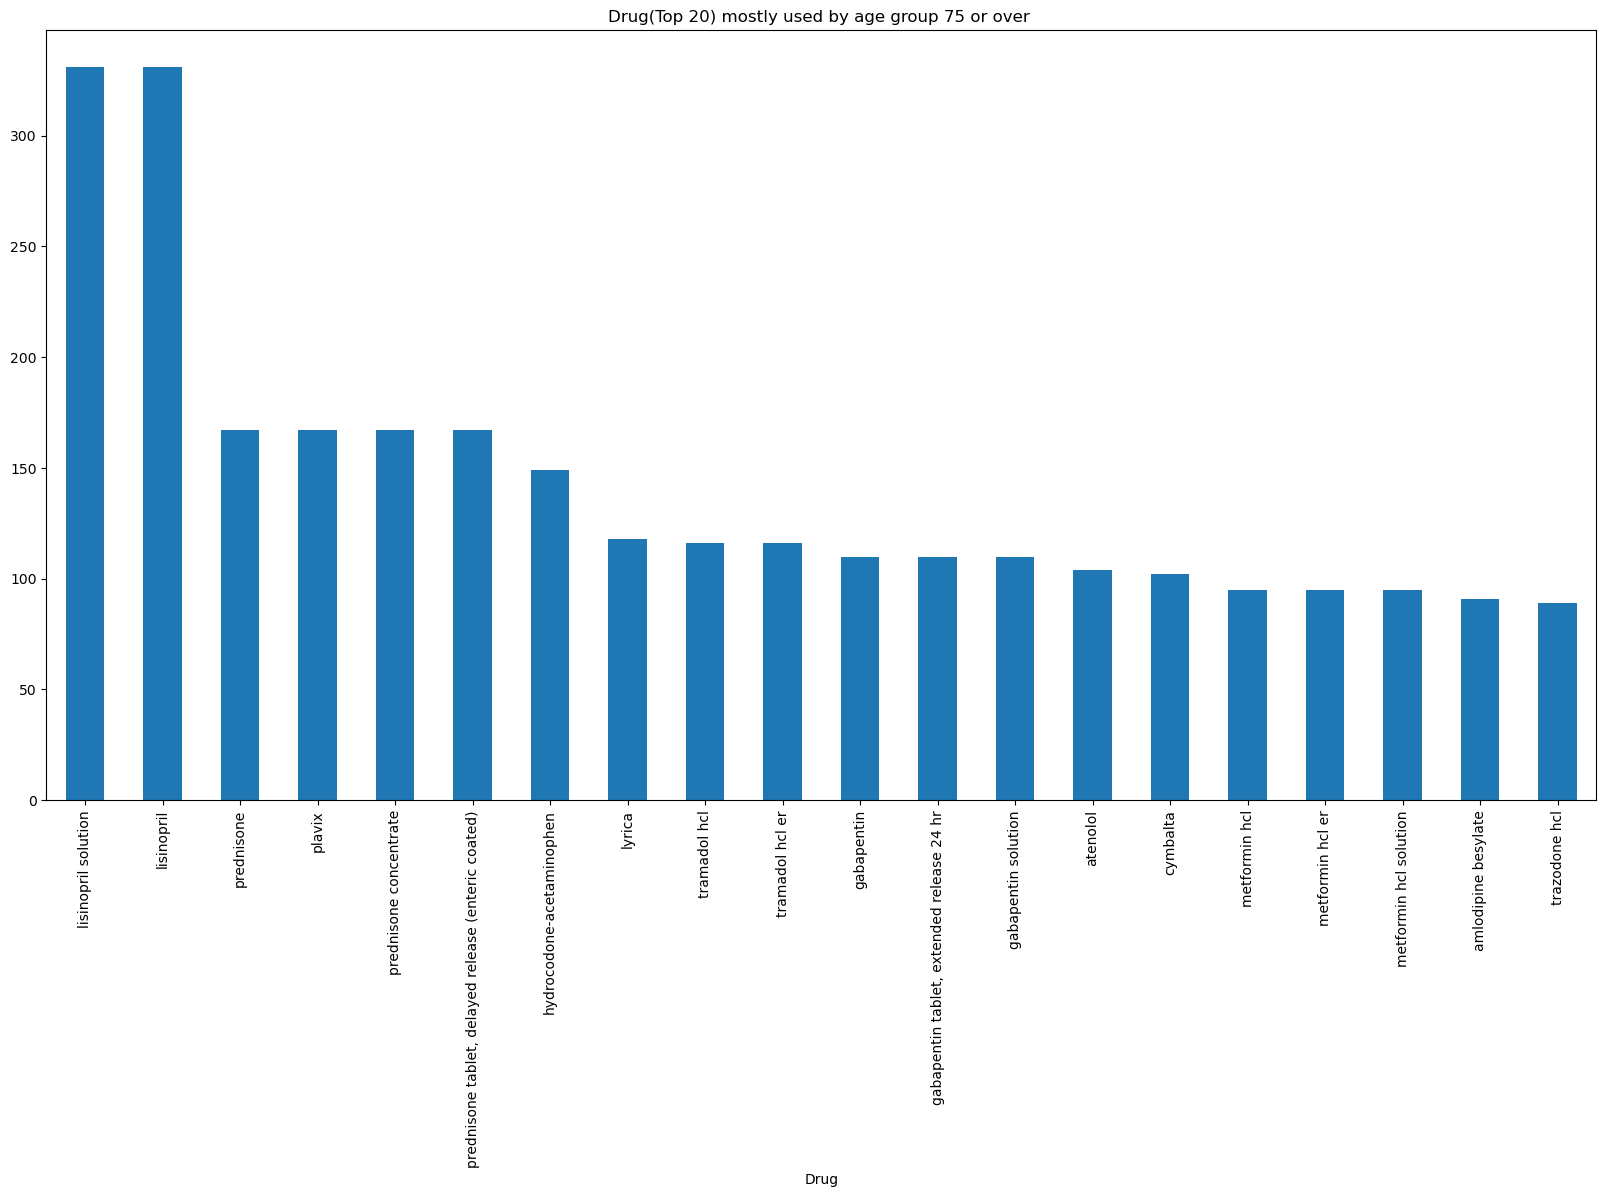

In [40]:
plt.subplots(figsize=(20,10))
df1['Drug'].value_counts().head(20).plot(kind='bar')
plt.xlabel('Drug')
plt.title('Drug(Top 20) mostly used by age group 75 or over ')
plt.show()

Drug mostly used by age group 75 or over is lisinopril solution

AGE 65-74

In [41]:
df2=df.get_group('65-74')

In [42]:
df2['Drug'].value_counts()

lisinopril solution                766
lisinopril                         766
hydrocodone-acetaminophen          412
prednisone concentrate             402
prednisone                         402
                                  ... 
guaiatussin ac                       1
ginkgo                               1
pamidronate disodium vial            1
guaifenesin (bulk) 100 % powder      1
warfarin (bulk) 100 % powder         1
Name: Drug, Length: 3467, dtype: int64

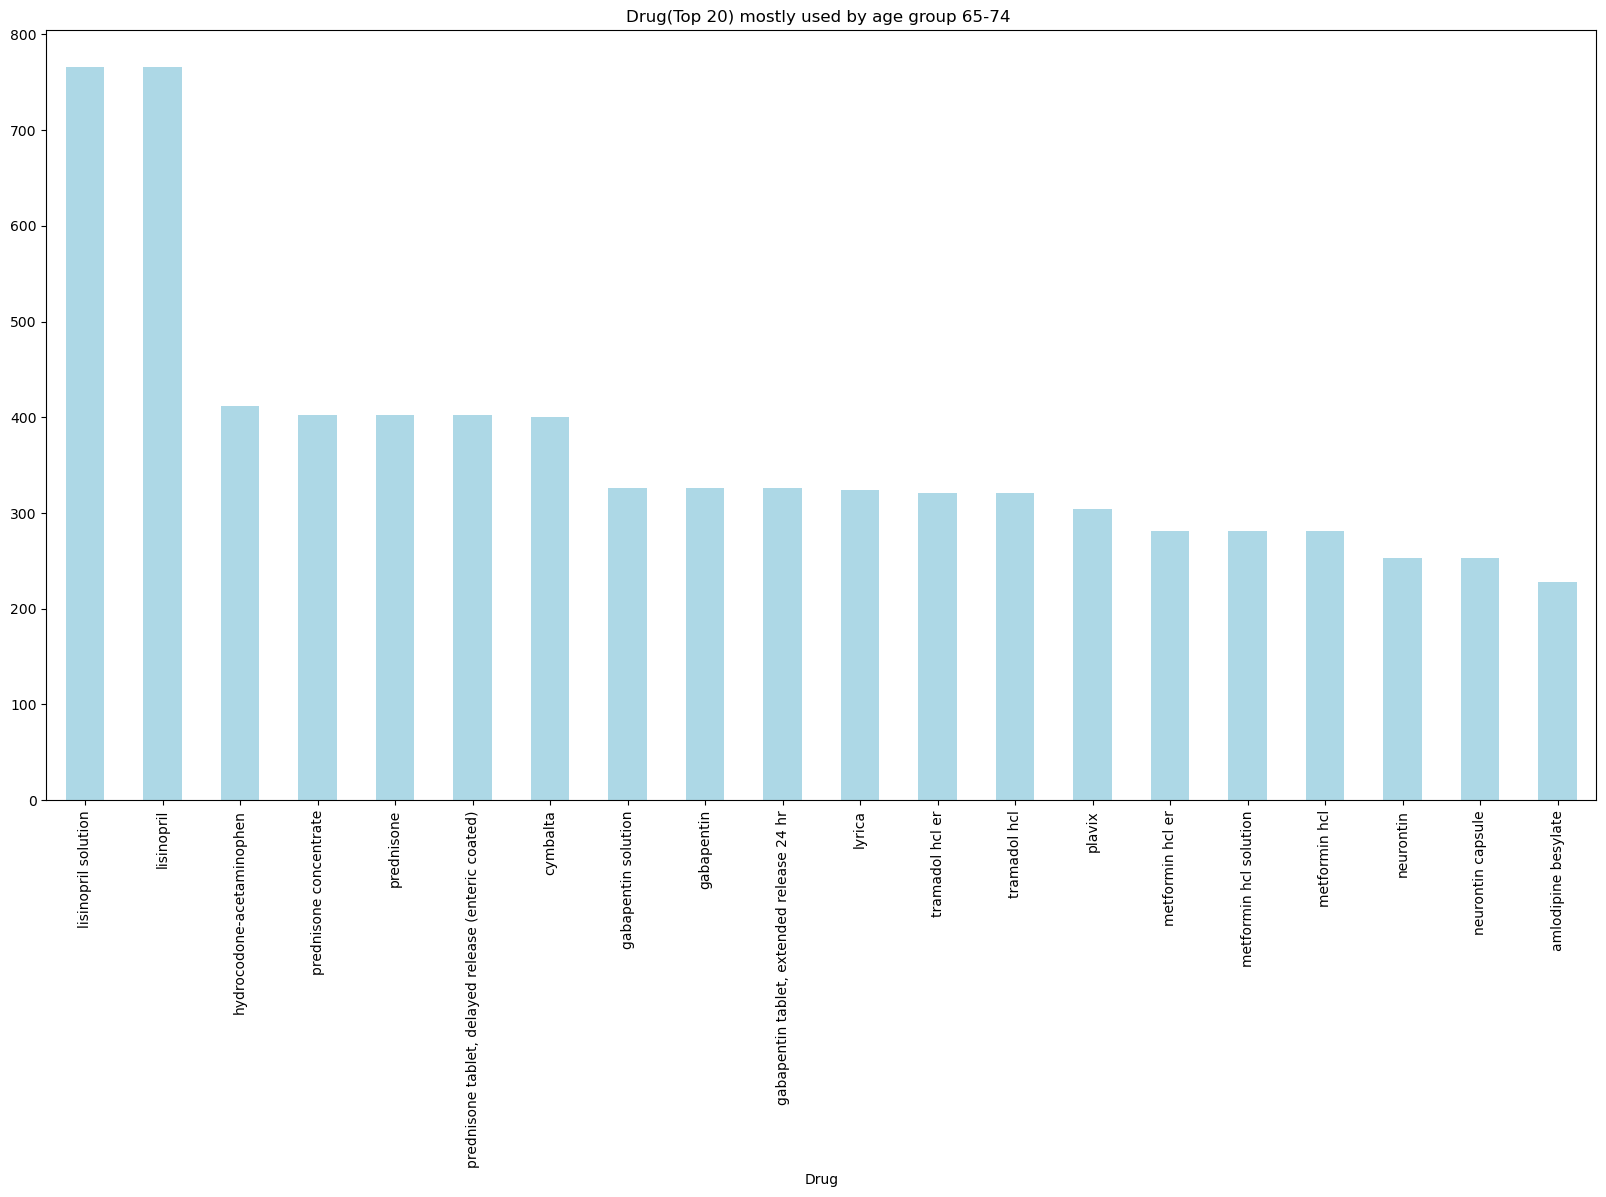

In [43]:
plt.subplots(figsize=(20,10))
df2['Drug'].value_counts().head(20).plot(kind='bar',color='lightblue')
plt.xlabel('Drug')
plt.title('Drug(Top 20) mostly used by age group 65-74 ')
plt.show()

Drug mostly used by age group 65-74 lisinopril solution

GE 55-64

In [44]:
df3=df.get_group('55-64')

In [45]:
df3['Drug'].value_counts()

lisinopril solution                                 1191
lisinopril                                          1191
cymbalta                                            1008
hydrocodone-acetaminophen                            831
lyrica                                               816
                                                    ... 
vancomycin-d5w solution, piggyback premix frozen       1
vandetanib tablet                                      1
vascazen                                               1
vasoflex hd                                            1
vogelxo gel                                            1
Name: Drug, Length: 4125, dtype: int64

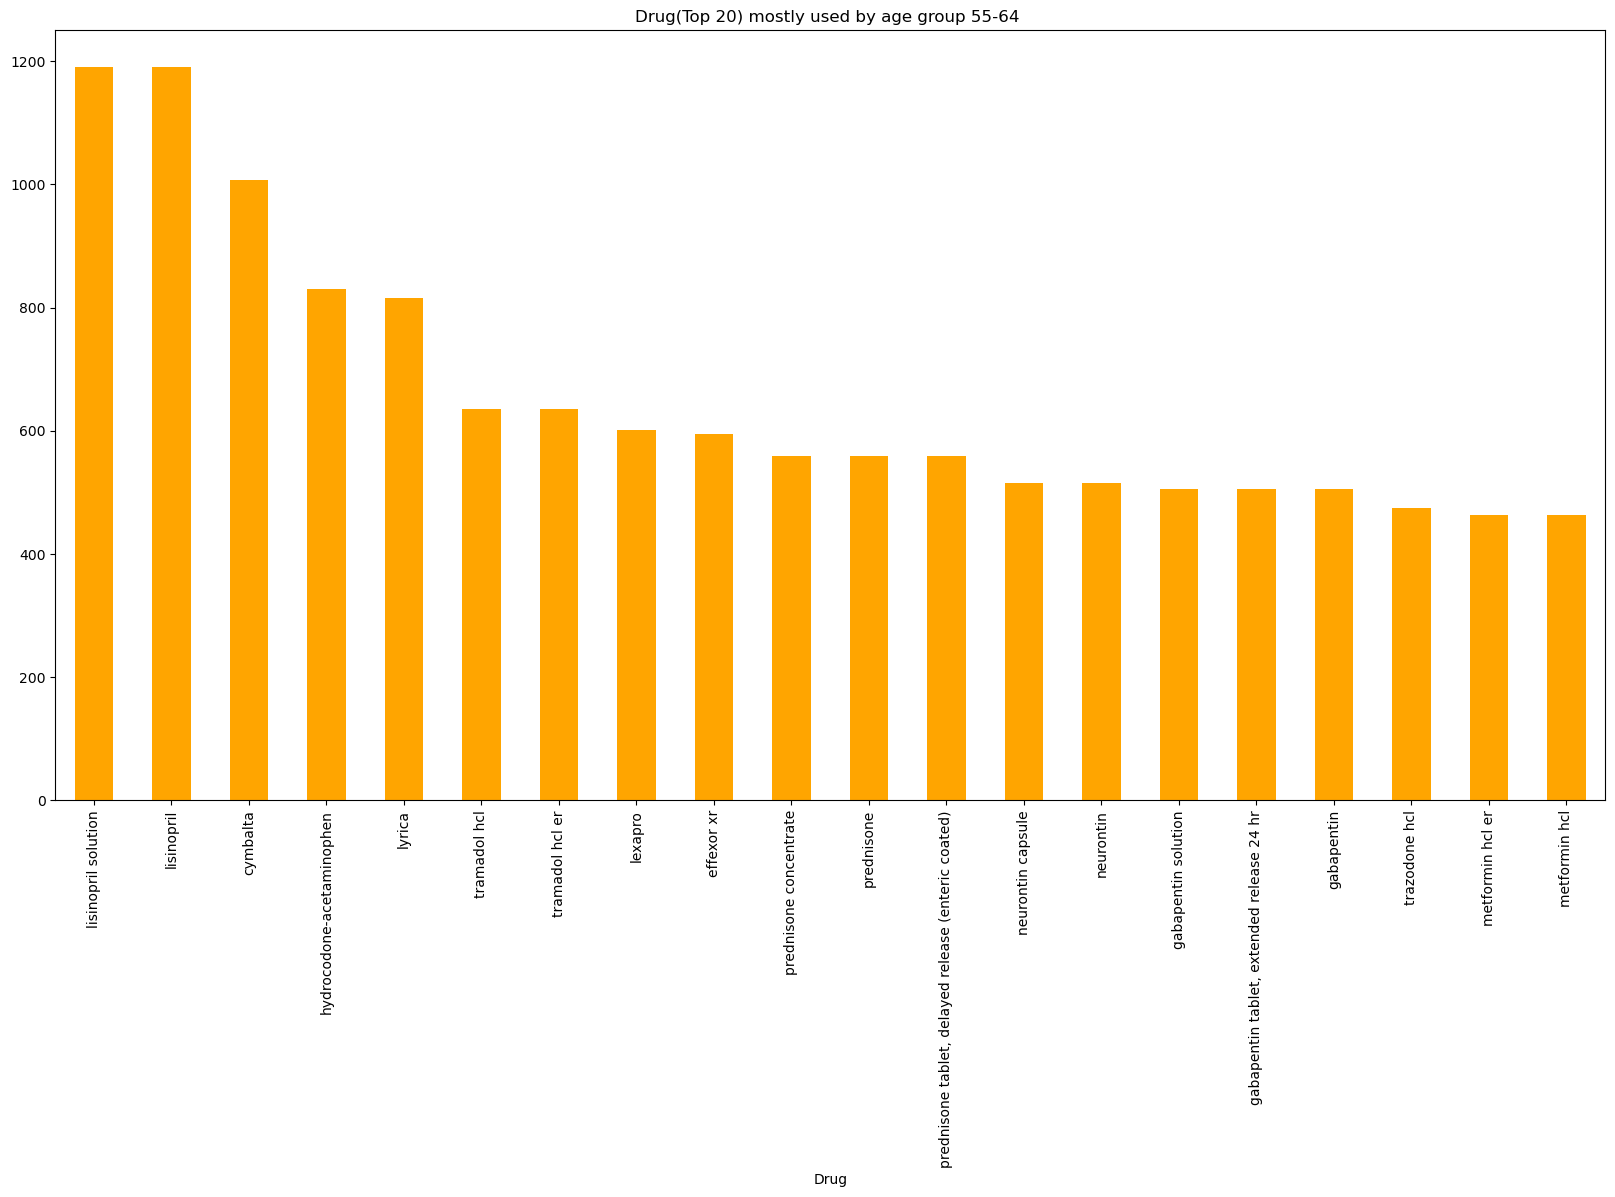

In [46]:
plt.subplots(figsize=(20,10))
df3['Drug'].value_counts().head(20).plot(kind='bar',color='orange')
plt.xlabel('Drug')
plt.title('Drug(Top 20) mostly used by age group 55-64 ')
plt.show()

Drug mostly used by age group 55-64 lisinopril solution

AGE 45-54

In [47]:
df4=df.get_group('45-54')

In [48]:
df4['Drug'].value_counts()

cymbalta                                       1291
lisinopril solution                            1111
lisinopril                                     1111
hydrocodone-acetaminophen                       960
lyrica                                          884
                                               ... 
varubi                                            1
vaseretic                                         1
vagistat-3 kit                                    1
vagisil towelette                                 1
urea lotion keratolytics (topical), general       1
Name: Drug, Length: 4123, dtype: int64

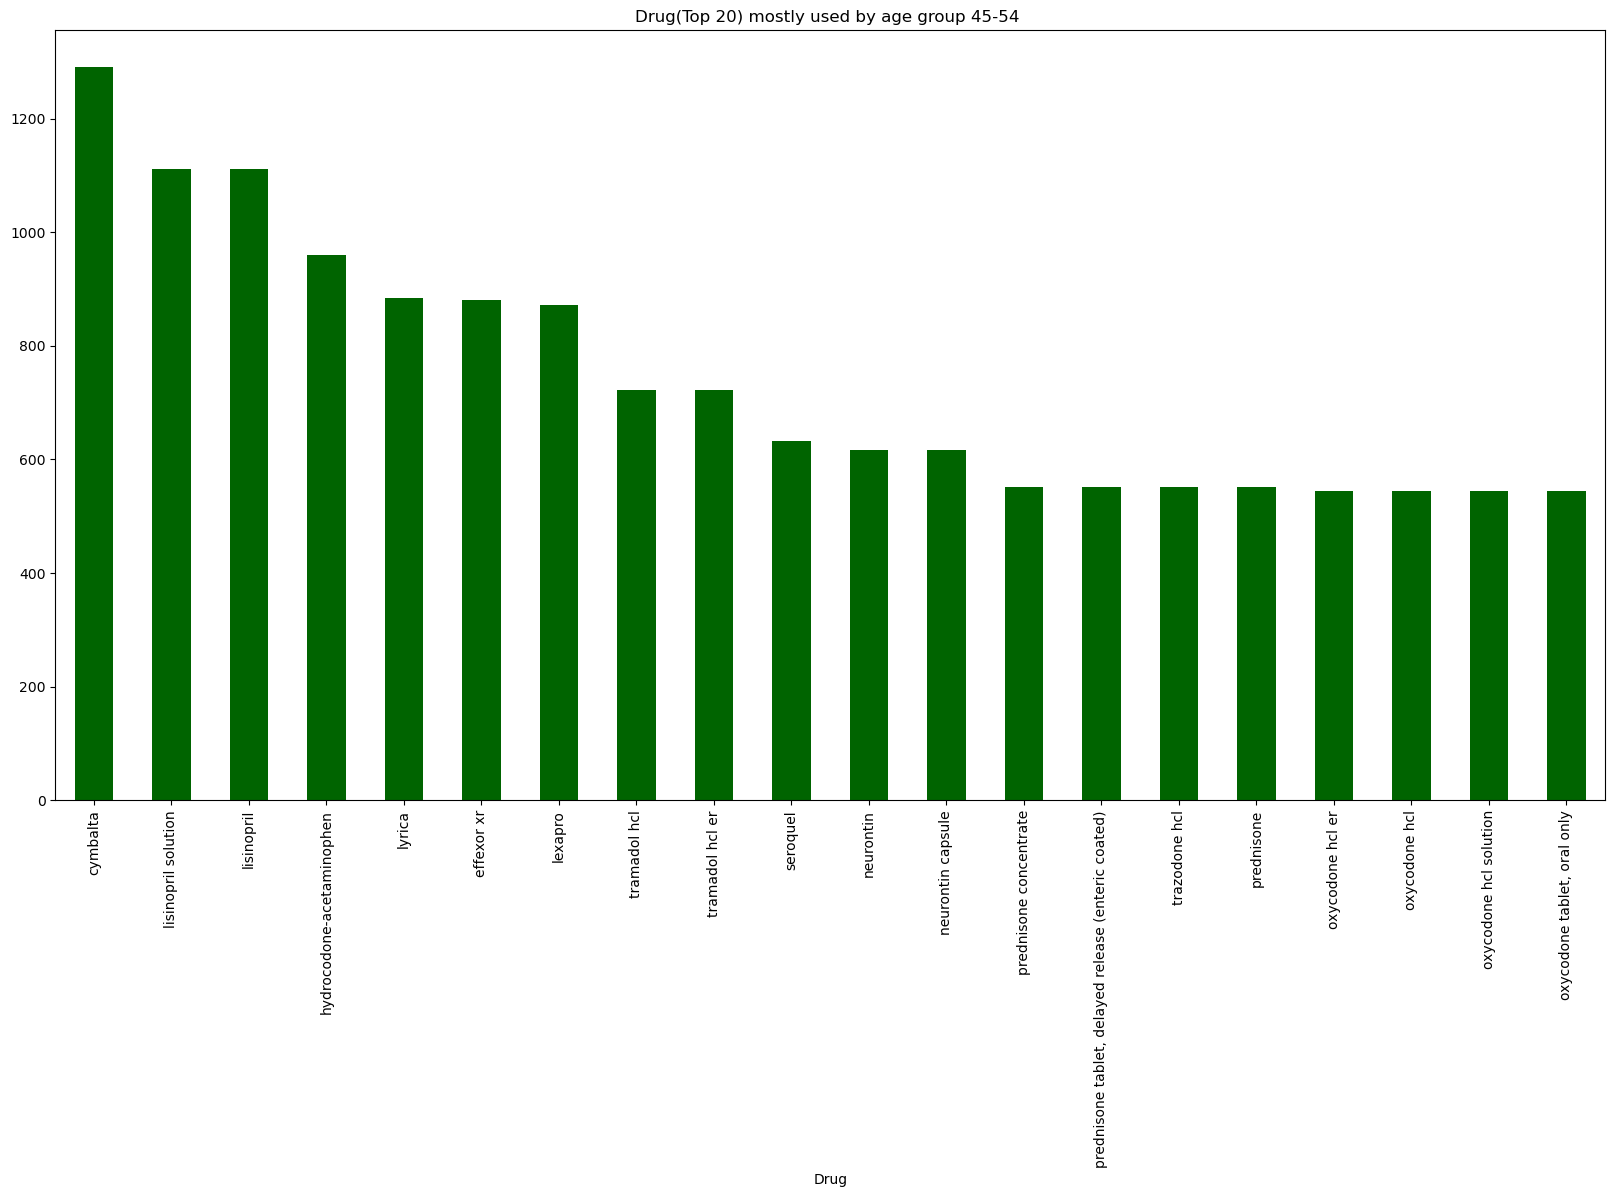

In [49]:
plt.subplots(figsize=(20,10))
df4['Drug'].value_counts().head(20).plot(kind='bar',color='darkgreen')
plt.xlabel('Drug')
plt.title('Drug(Top 20) mostly used by age group 45-54 ')
plt.show()

Drug mostly used by age group 45-54 is Cymbalta

AGE 35-44

In [50]:
df5=df.get_group('35-44')

In [51]:
df5['Drug'].value_counts()

cymbalta                                       874
lexapro                                        809
effexor xr                                     693
hydrocodone-acetaminophen                      690
phentermine hcl                                629
                                              ... 
sleep aid tablet                                 1
ferric ammonium citrate (bulk) 100 % powder      1
ferrogels forte                                  1
ferrous fum-vit c-vit b12-fa capsule             1
warfarin (bulk) 100 % powder                     1
Name: Drug, Length: 3670, dtype: int64

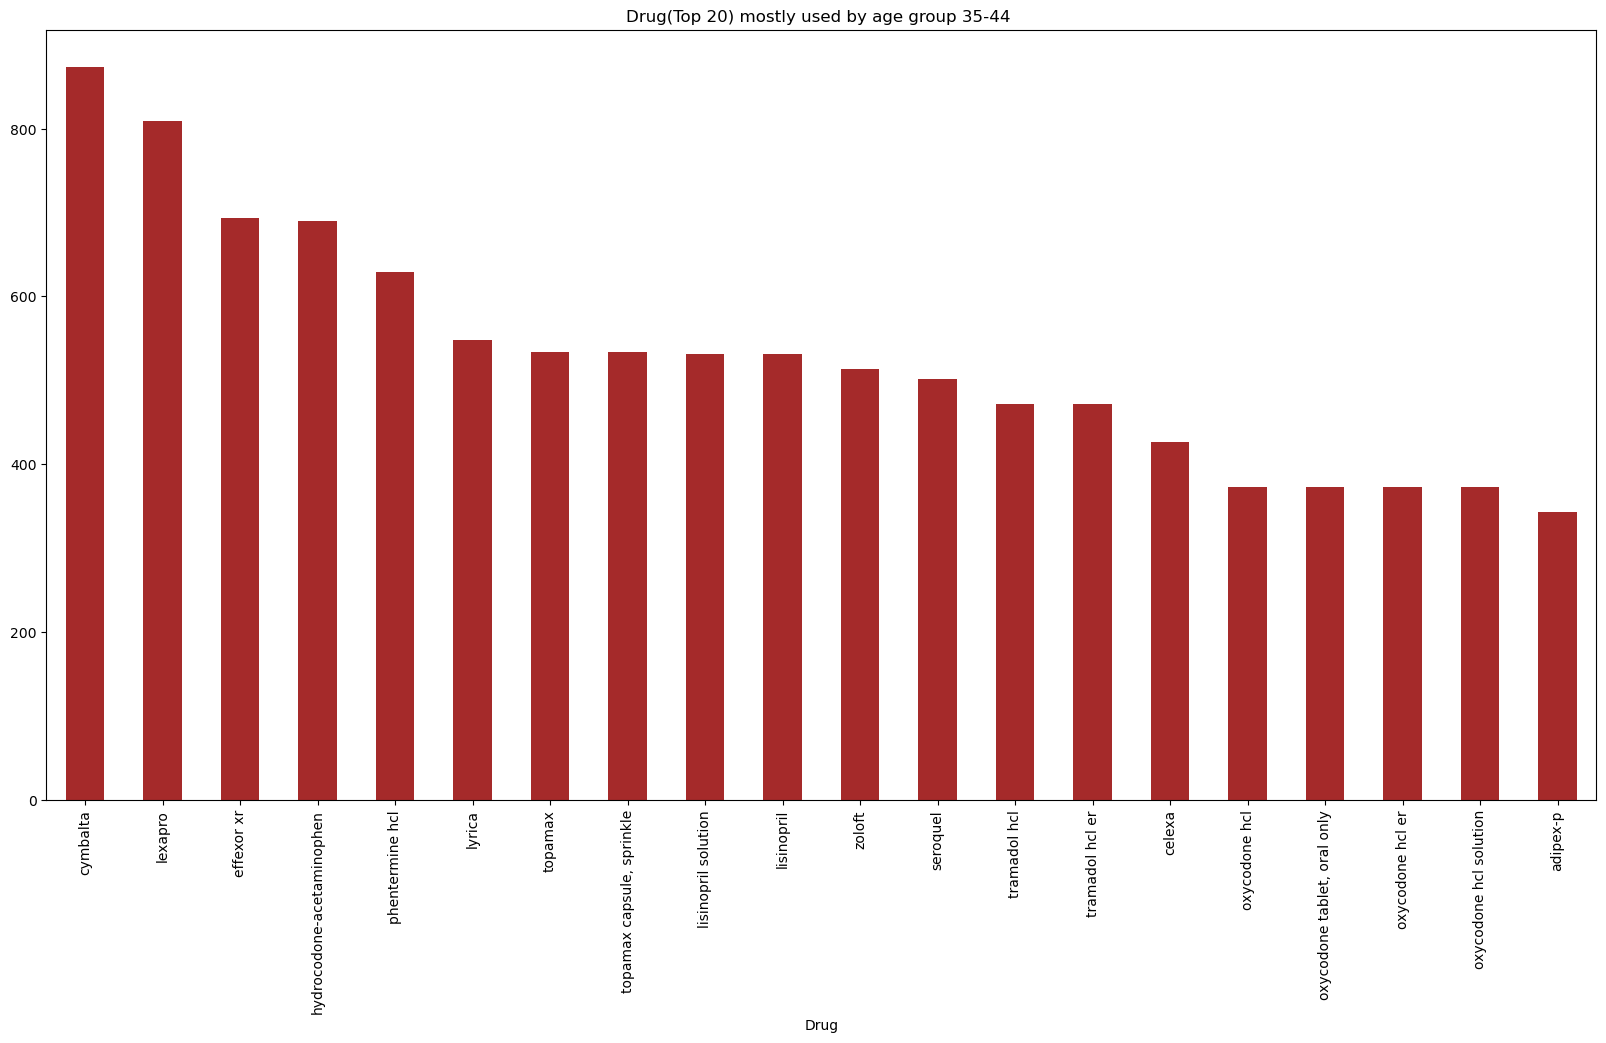

In [52]:
plt.subplots(figsize=(20,10))
df5['Drug'].value_counts().head(20).plot(kind='bar',color='brown')
plt.xlabel('Drug')
plt.title('Drug(Top 20) mostly used by age group 35-44 ')
plt.show()

Drug mostly used by age group 35-44 is Cymbalta

Age 25-34

In [53]:
df6=df.get_group('25-34')

In [54]:
df6['Drug'].value_counts()

lexapro                          846
mirena intrauterine device       829
phentermine hcl                  795
effexor xr                       674
cymbalta                         594
                                ... 
axitinib tablet                    1
ayr saline spray, non-aerosol      1
vicks dayquil-nyquil cold-flu      1
vicks dayquil mucus control        1
urea cream emollients              1
Name: Drug, Length: 3338, dtype: int64

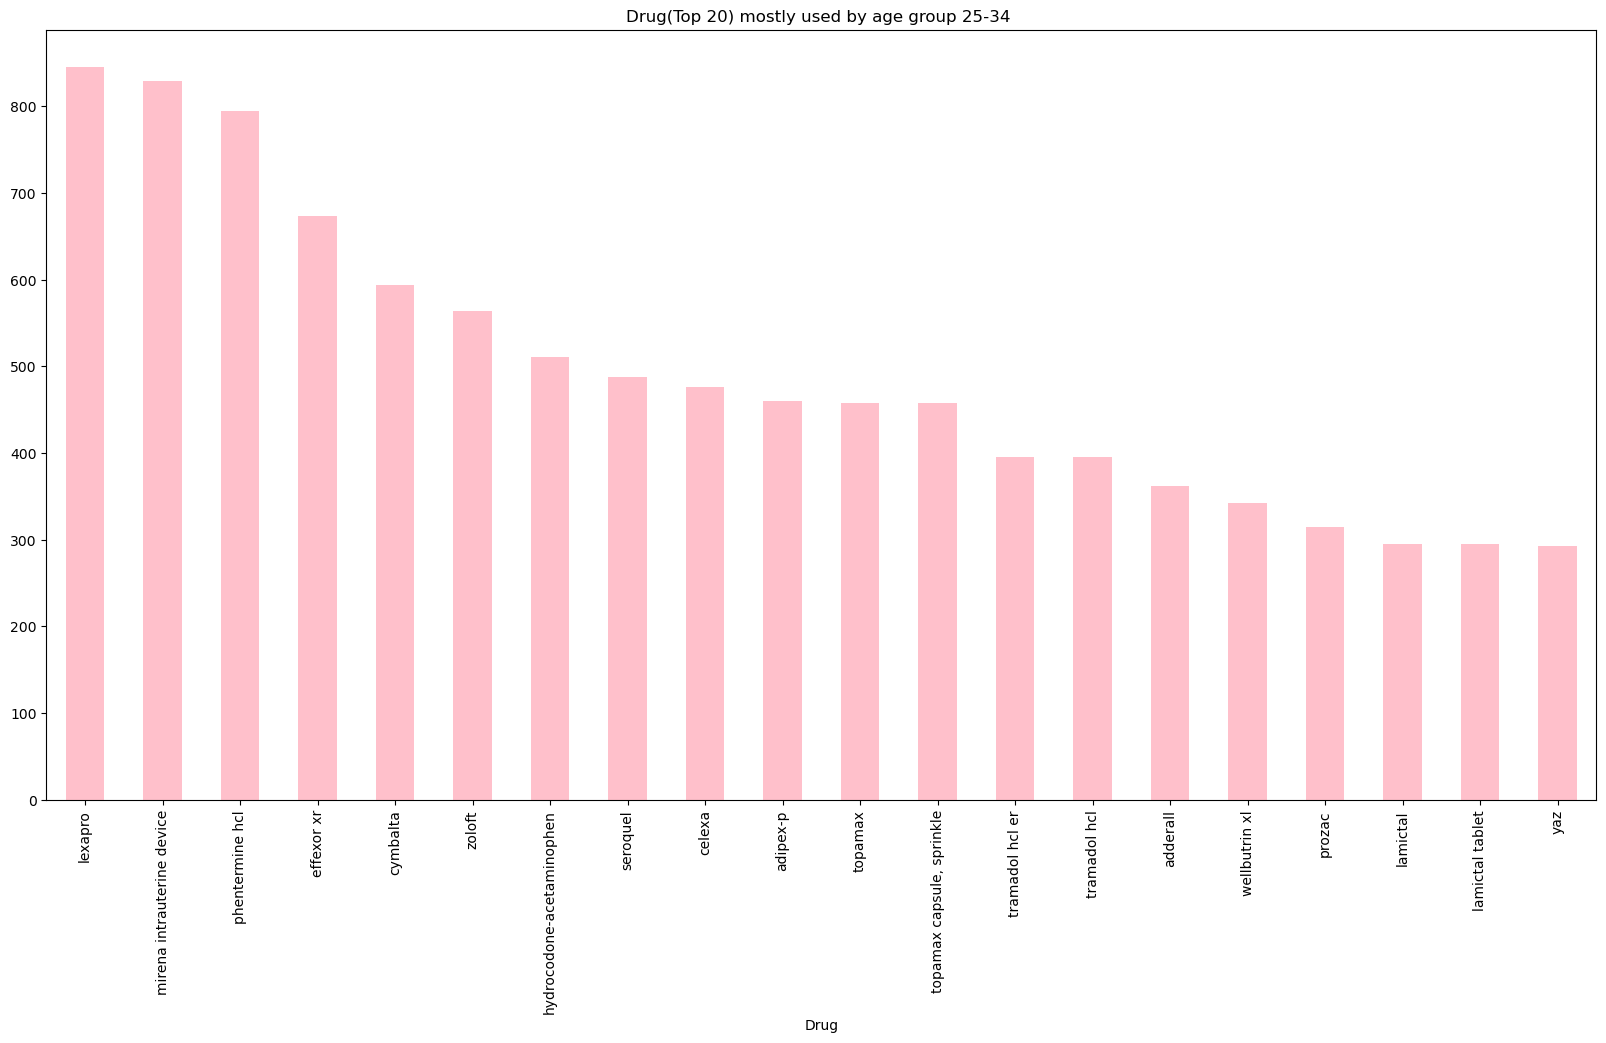

In [55]:
plt.subplots(figsize=(20,10))
df6['Drug'].value_counts().head(20).plot(kind='bar',color='pink')
plt.xlabel('Drug')
plt.title('Drug(Top 20) mostly used by age group 25-34 ')
plt.show()

Drug mostly used by age group 25-34 is lexapro

AGE 19-24

In [56]:
df7=df.get_group('19-24')

In [57]:
df7['Drug'].value_counts()

mirena intrauterine device                                  457
sprintec                                                    424
lexapro                                                     393
zoloft                                                      289
tri-sprintec                                                262
                                                           ... 
aspirin tablet                                                1
aspirin capsule, extended release 24 hr (capsule, er hr)      1
aspirin                                                       1
aricept                                                       1
gyne-lotrimin-7 cream with applicator                         1
Name: Drug, Length: 2187, dtype: int64

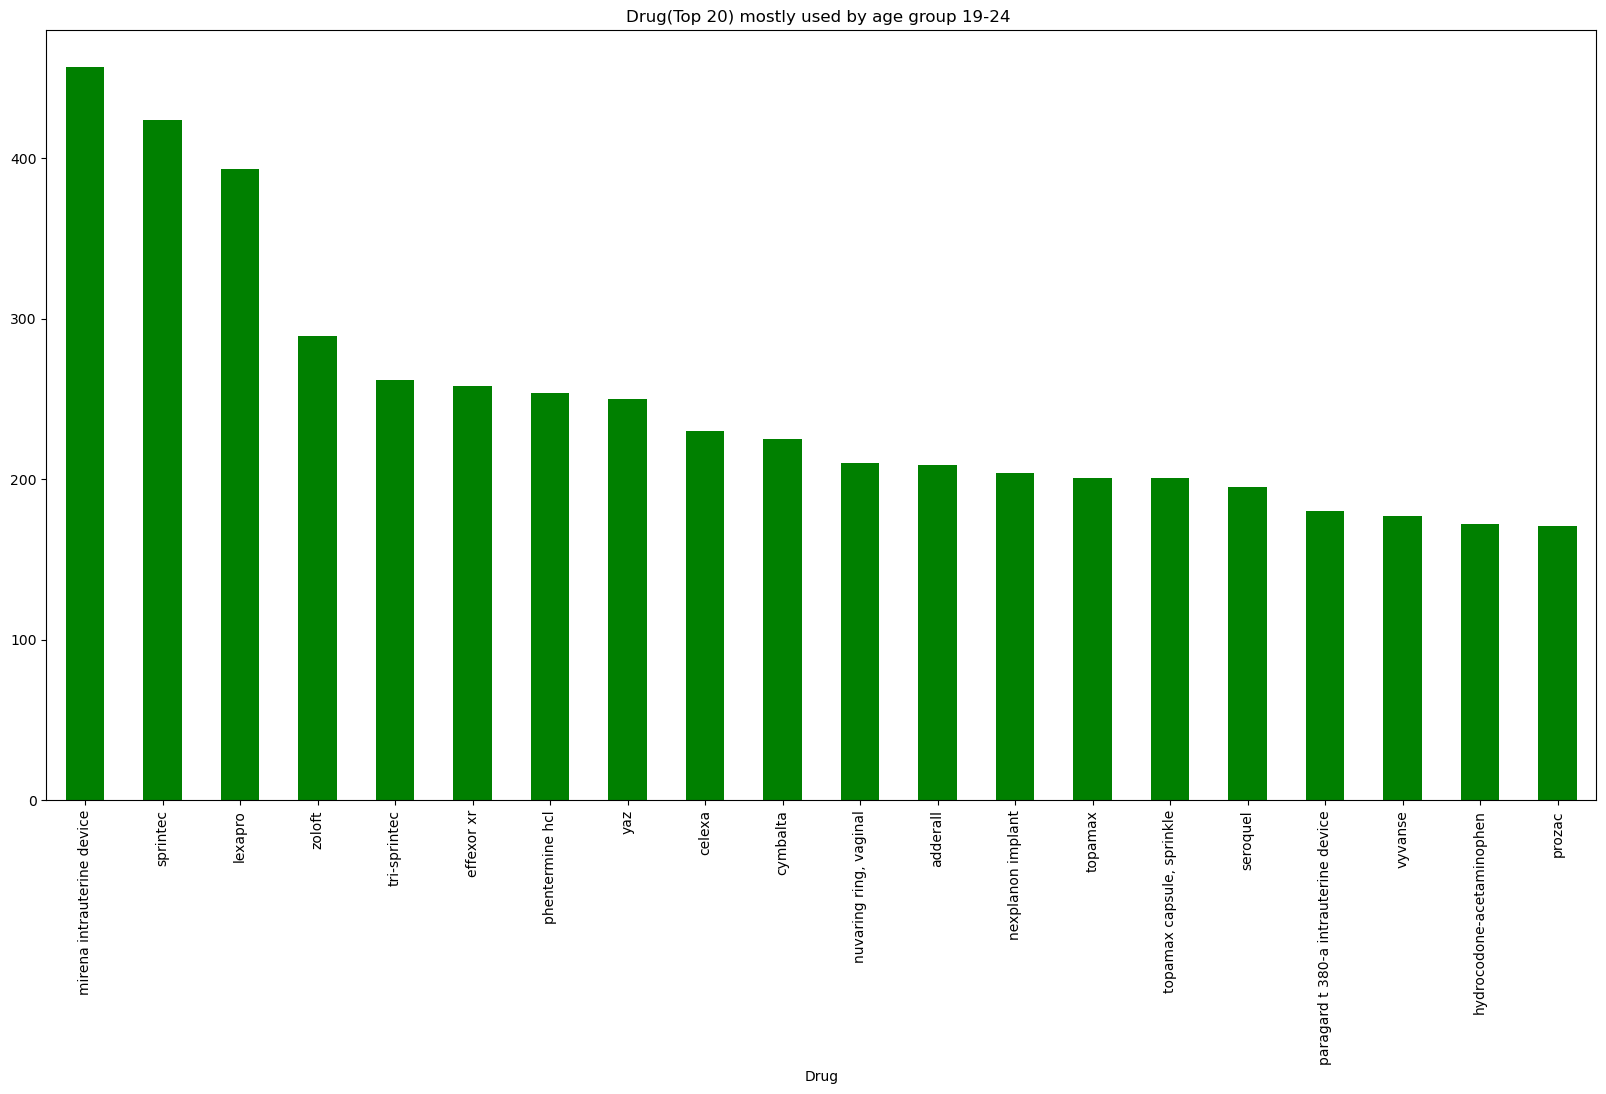

In [58]:
plt.subplots(figsize=(20,10))
df7['Drug'].value_counts().head(20).plot(kind='bar',color='green')
plt.xlabel('Drug')
plt.title('Drug(Top 20) mostly used by age group 19-24 ')
plt.show()

Drug mostly used by age group 19-24 is Mirena intrauterine device

AGE 13-18

In [59]:
df8=df.get_group('13-18')

In [60]:
df8['Drug'].value_counts()

lexapro                       155
vyvanse                       152
zoloft                        147
concerta                      141
sprintec                      133
                             ... 
tranylcypromine sulfate         1
tranexamic acid                 1
tramadol hcl-acetaminophen      1
tylenol extra strength          1
taclonex ointment               1
Name: Drug, Length: 1280, dtype: int64

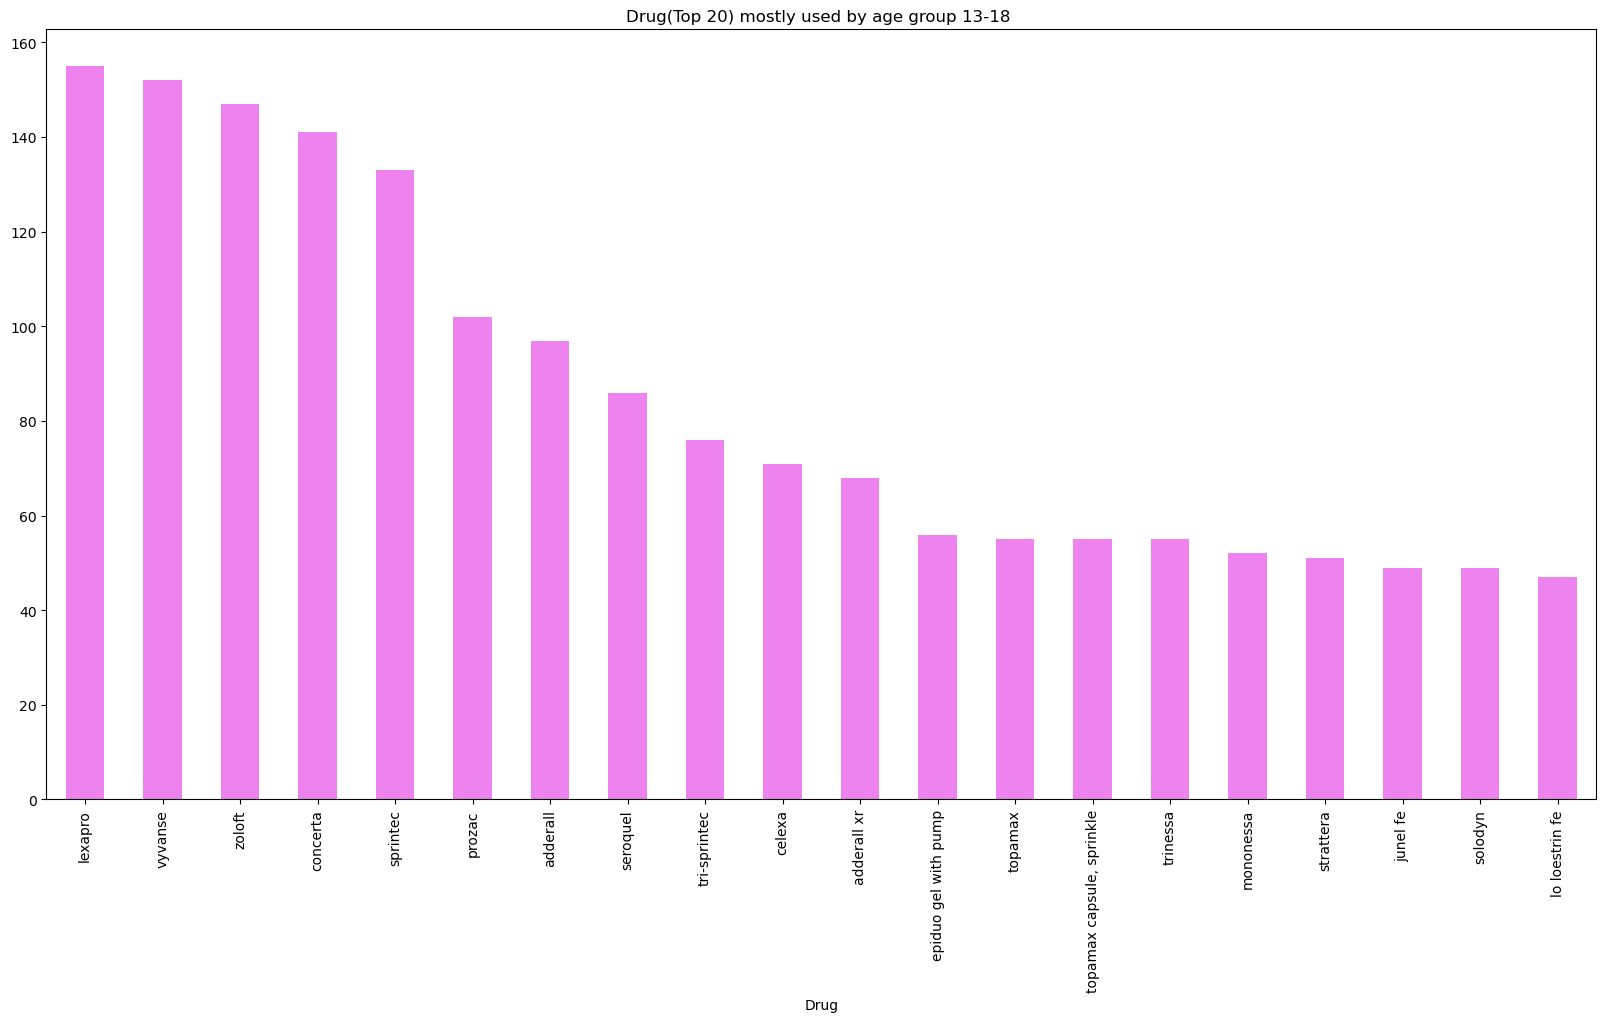

In [61]:
plt.subplots(figsize=(20,10))
df8['Drug'].value_counts().head(20).plot(kind='bar',color='violet')
plt.xlabel('Drug')
plt.title('Drug(Top 20) mostly used by age group 13-18 ')
plt.show()

Drug mostly used by age group 13-18 Lexapro

AGE 7-12

In [62]:
df9=df.get_group('7-12')

In [63]:
df9['Drug'].value_counts()

vyvanse                          146
concerta                          97
focalin xr                        61
intuniv                           45
adderall xr                       41
                                ... 
sprycel                            1
sodium fluoride                    1
sulfasalazine dr                   1
sulfamethoxazole-trimethoprim      1
children's allegra allergy         1
Name: Drug, Length: 462, dtype: int64

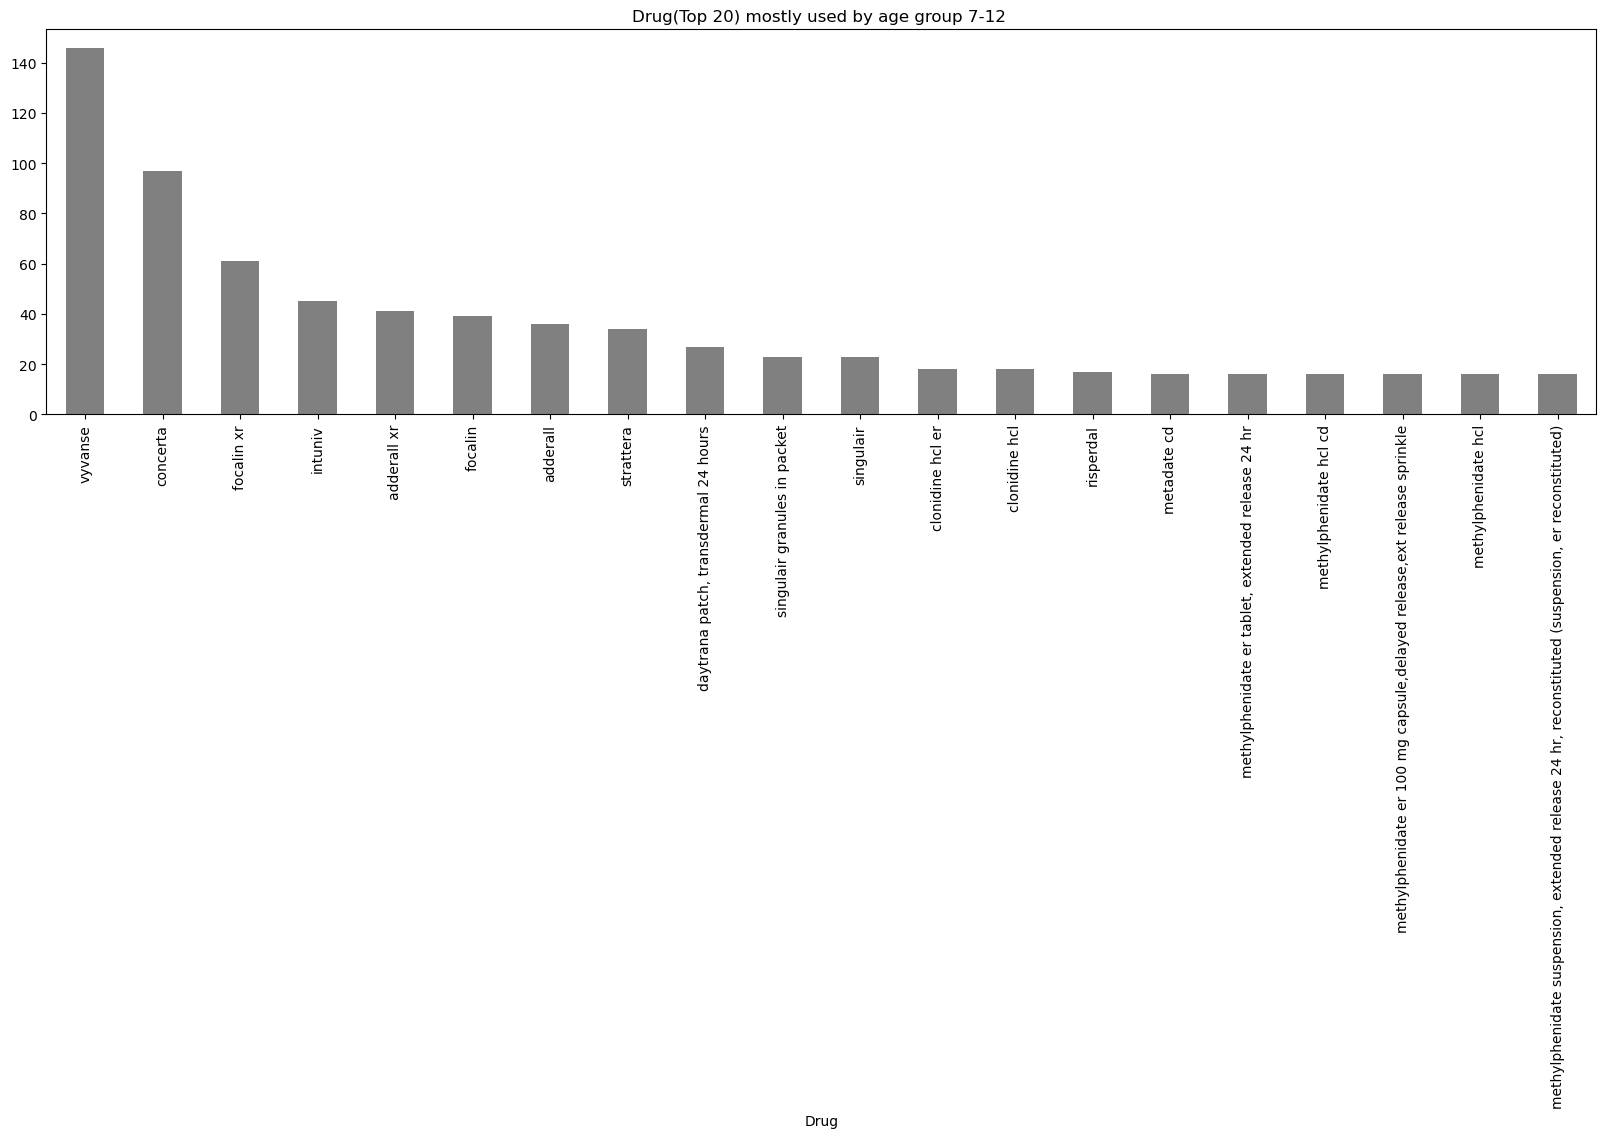

In [64]:
plt.subplots(figsize=(20,5))
df9['Drug'].value_counts().head(20).plot(kind='bar',color='grey')
plt.xlabel('Drug')
plt.title('Drug(Top 20) mostly used by age group 7-12 ')
plt.show()

Drug mostly used by age group 7-12is Vyvanse

AGE 3-6

In [65]:
df10=df.get_group('3-6')

In [66]:
df10['Drug'].value_counts()

vyvanse                         50
adderall                        27
singulair granules in packet    25
singulair                       25
risperdal                       23
                                ..
xyzal                            1
xeljanz                          1
xeljanz xr                       1
vasoflex forte                   1
allergy relief tablet            1
Name: Drug, Length: 325, dtype: int64

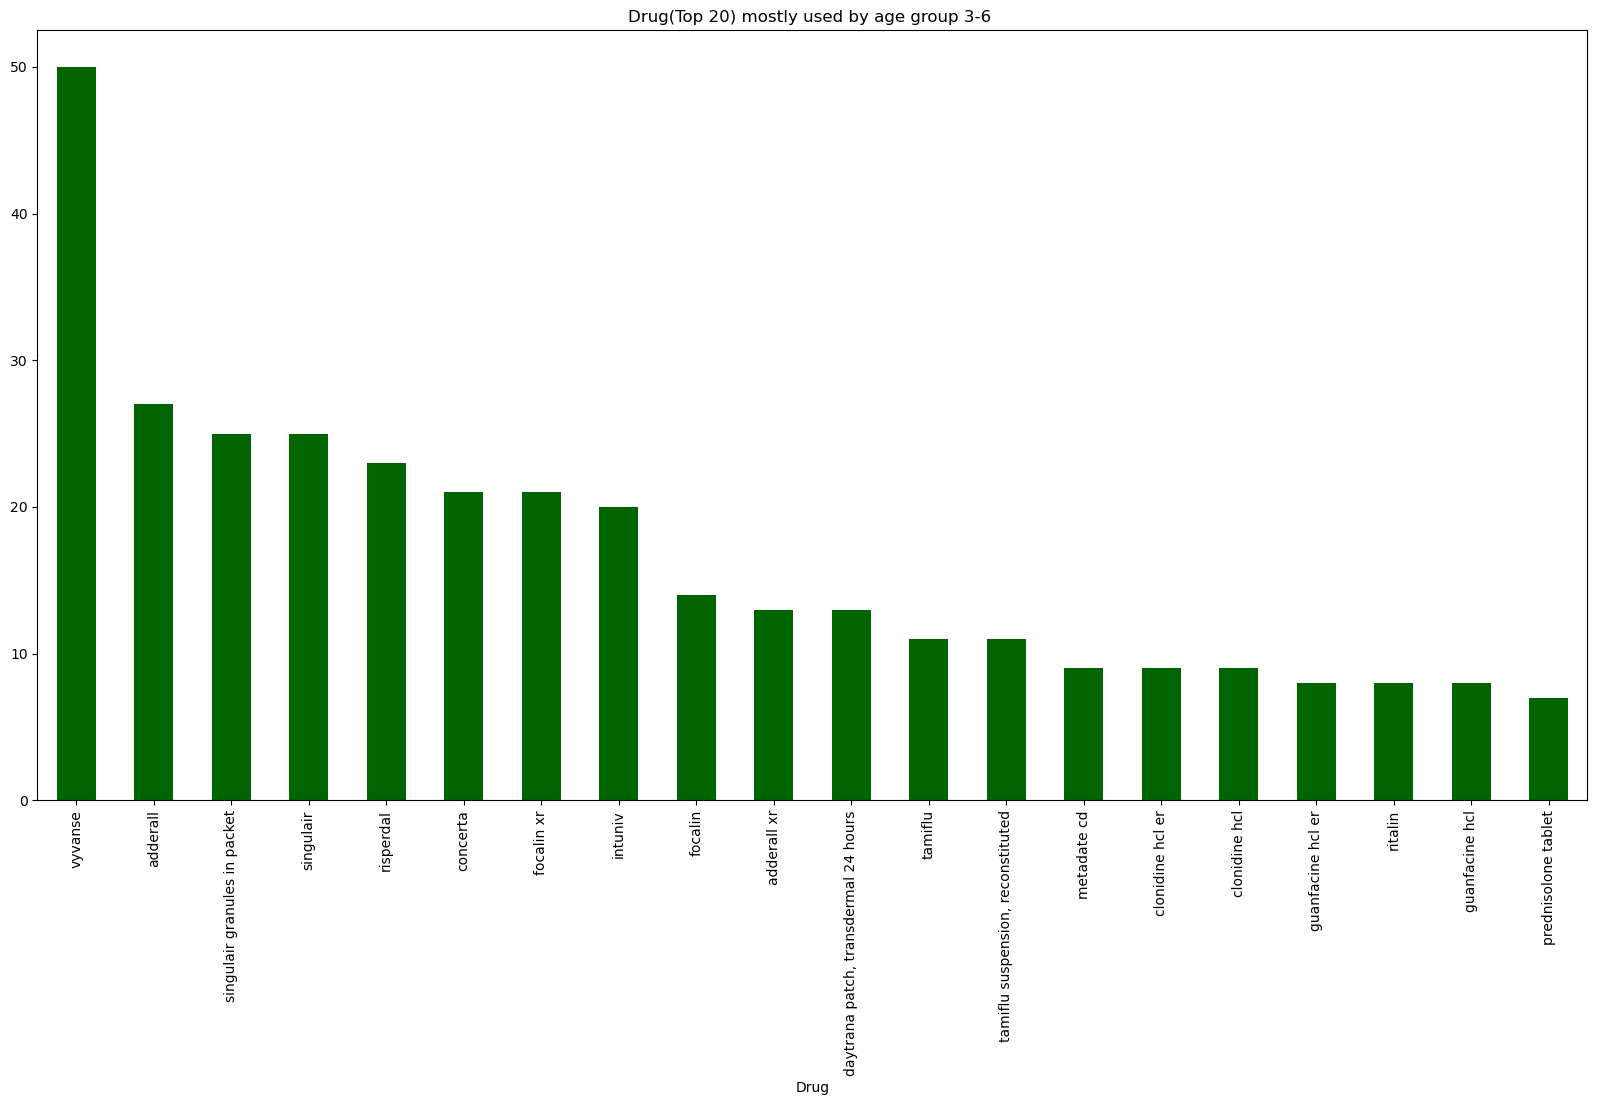

In [67]:
plt.subplots(figsize=(20,10))
df10['Drug'].value_counts().head(20).plot(kind='bar',color='darkgreen')
plt.xlabel('Drug')
plt.title('Drug(Top 20) mostly used by age group 3-6 ')
plt.show()

Drug mostly used by age group 3-6 is Vyvanse

In [68]:
#data.to_csv('Intership_dataset.csv', index = False)

In [69]:
data['Age'] = data['Age'].replace(' ', np.nan)

In [70]:
data['Sides'] = data['Sides'].replace(' ', np.nan)

In [71]:
data['Condition'] = data['Condition'].replace(' ', np.nan)

In [72]:
#data['Reviews'].fillna('No Reviews', inplace=True)

In [73]:
#data['Sides'].fillna('No Sides', inplace=True)

# Univariate analysis

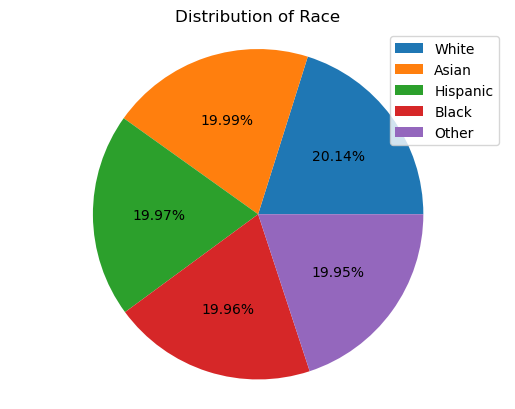

In [74]:
count = data['Race'].value_counts().tolist()
labels = data['Race'].value_counts().index.tolist()
plt.pie(count, autopct='%.2f%%')
plt.legend(labels,loc = 'best')
plt.title('Distribution of Race')
plt.axis('equal')

plt.show()

In [75]:
data.Age.value_counts()

45-54         80043
55-64         75136
35-44         55011
25-34         49718
65-74         41216
19-24         24230
75 or over    15226
13-18          7045
7-12           1644
3-6             838
0-2             497
Name: Age, dtype: int64

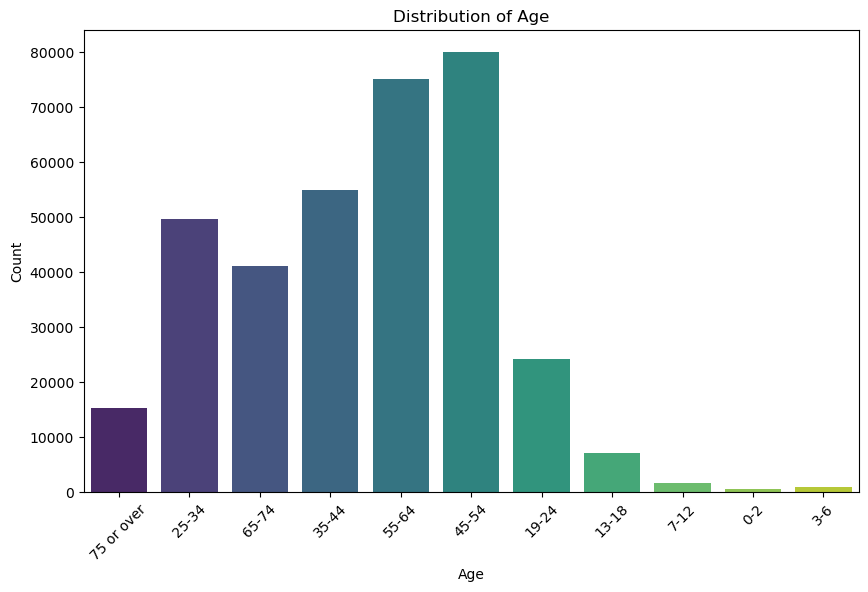

In [76]:
# Create a count plot for the "Age" column
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
sns.countplot(x='Age', data=data, palette='viridis')  # Create the count plot
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better readability
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')

# Show the plot
plt.show()

In [77]:
data.Condition.value_counts()

Other                                                  49765
Pain                                                   25232
High Blood Pressure                                    23275
Depression                                             14509
Birth Control                                          12253
                                                       ...  
Diagnostic Test for Myasthenia Gravis                      1
Myelodysplastic Syndrome with 5q Deletion Gene Type        1
Hunter Syndrome                                            1
Increased Uric Acid due to Cancer Chemotherapy             1
Adverse Effect of Benzodiazepine-Based Tranquilizer        1
Name: Condition, Length: 1805, dtype: int64

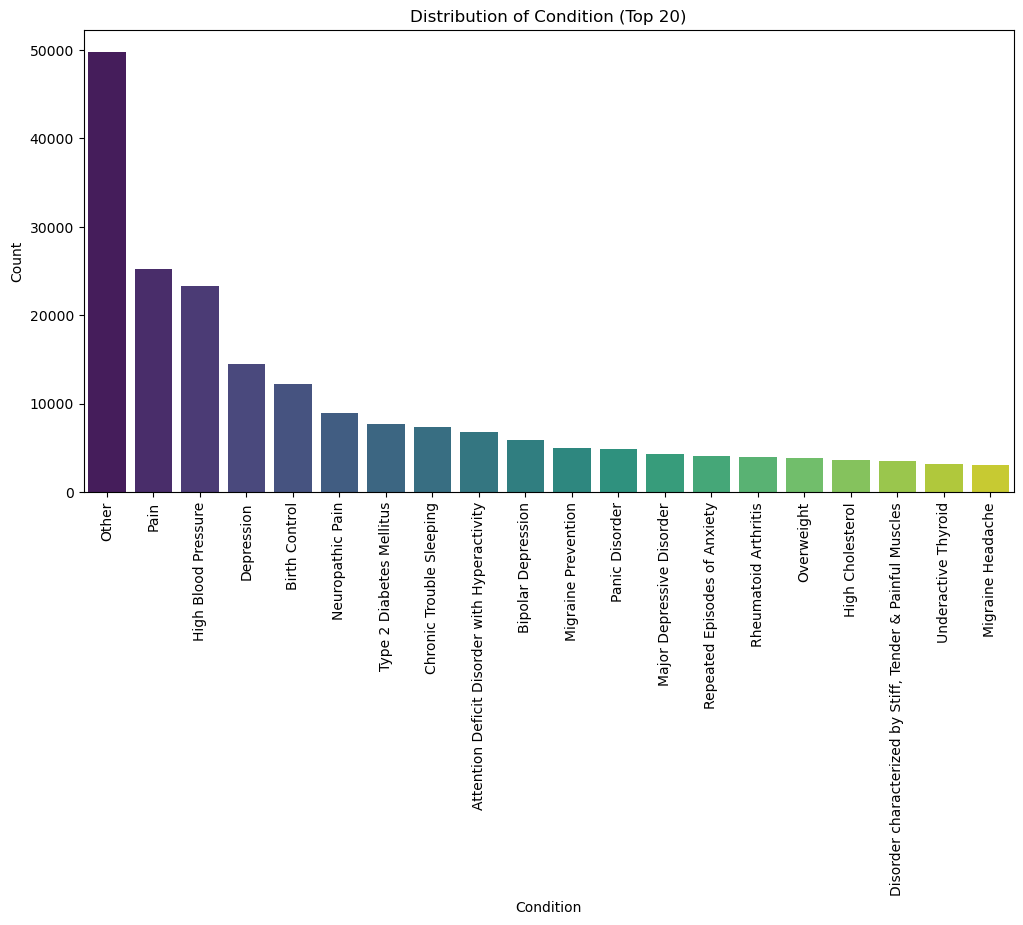

In [78]:
# Count the occurrences of each condition and select the top 20
condition_counts = data['Condition'].value_counts().head(20)

# Create a count plot for the top 20 conditions
plt.figure(figsize=(12, 6))  # Set the figure size
sns.countplot(x='Condition', data=data, order=condition_counts.index, palette='viridis')  # Create the count plot
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Distribution of Condition (Top 20)')
plt.xlabel('Condition')
plt.ylabel('Count')

# Show the plot
plt.show()

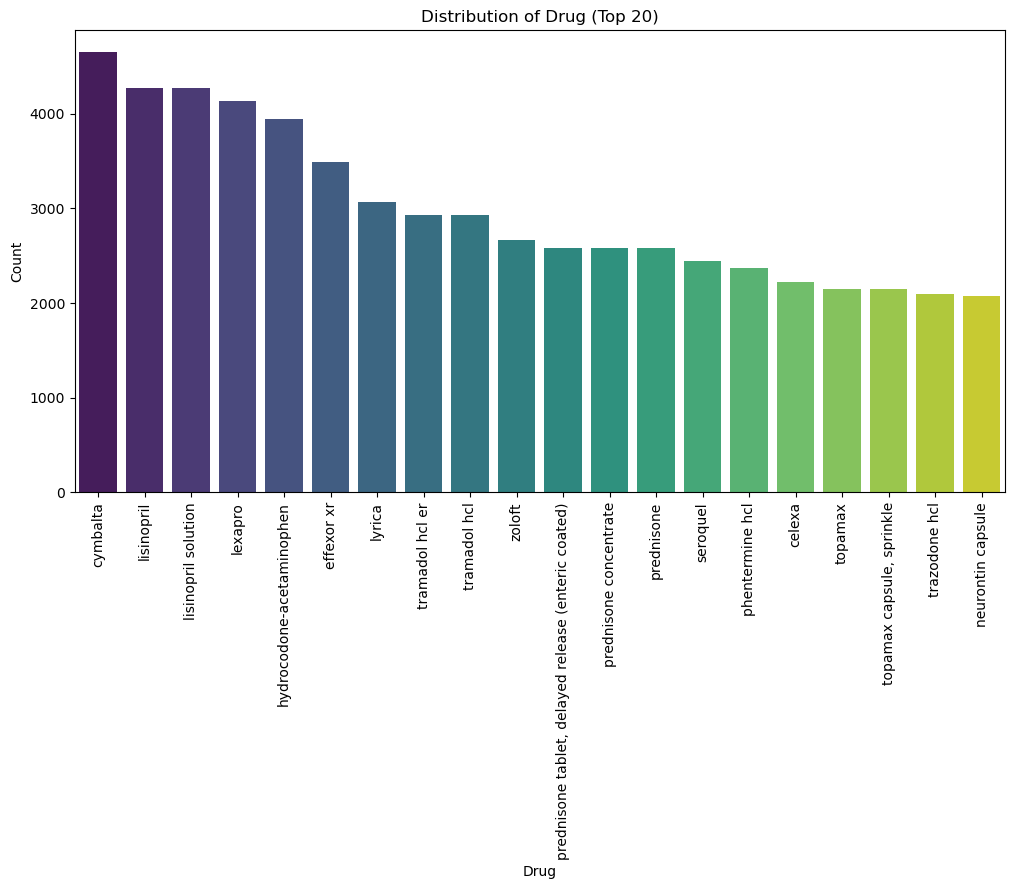

In [79]:
# Count the occurrences of each condition and select the top 20
condition_counts = data['Drug'].value_counts().head(20)

# Create a count plot for the top 20 conditions
plt.figure(figsize=(12, 6))  # Set the figure size
sns.countplot(x='Drug', data=data, order=condition_counts.index, palette='viridis')  # Create the count plot
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Distribution of Drug (Top 20)')
plt.xlabel('Drug')
plt.ylabel('Count')

# Show the plot
plt.show()

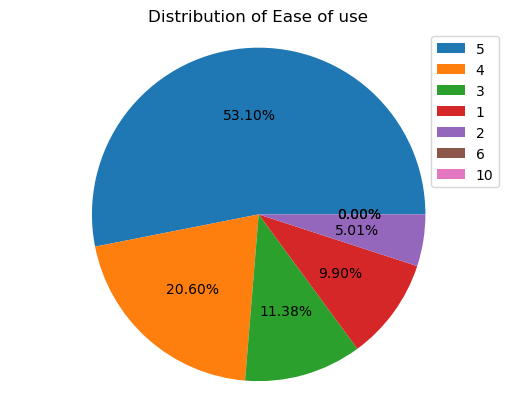

In [80]:
count = data['EaseofUse'].value_counts().tolist()
labels = data['EaseofUse'].value_counts().index.tolist()
plt.pie(count, autopct='%.2f%%')
plt.legend(labels,loc = 'best')
plt.title('Distribution of Ease of use')
plt.axis('equal')

plt.show()

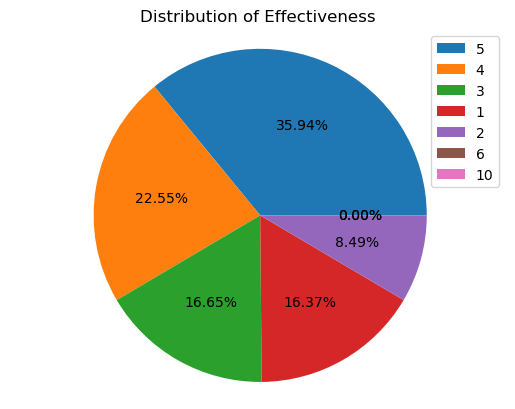

In [81]:
count = data['Effectiveness'].value_counts().tolist()
labels = data['Effectiveness'].value_counts().index.tolist()
plt.pie(count, autopct='%.2f%%')
plt.legend(labels,loc = 'best')
plt.title('Distribution of Effectiveness')
plt.axis('equal')

plt.show()

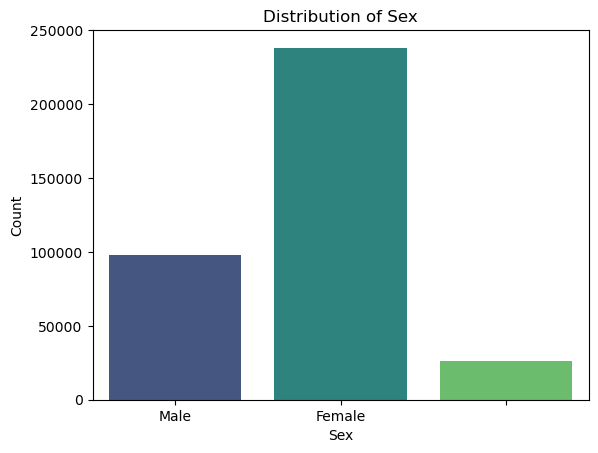

In [82]:
# Create a count plot for the "Age" column
#plt.figure(figsize=(10, 6))  # Optional: Set the figure size
sns.countplot(x='Sex', data=data, palette='viridis')  # Create the count plot
plt.xticks(rotation=0)  # Optional: Rotate x-axis labels for better readability
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')

# Show the plot
plt.show()

In [83]:
data.Satisfaction.value_counts()

5     111550
1     100901
4      63158
3      51852
2      35342
6          2
10         1
Name: Satisfaction, dtype: int64

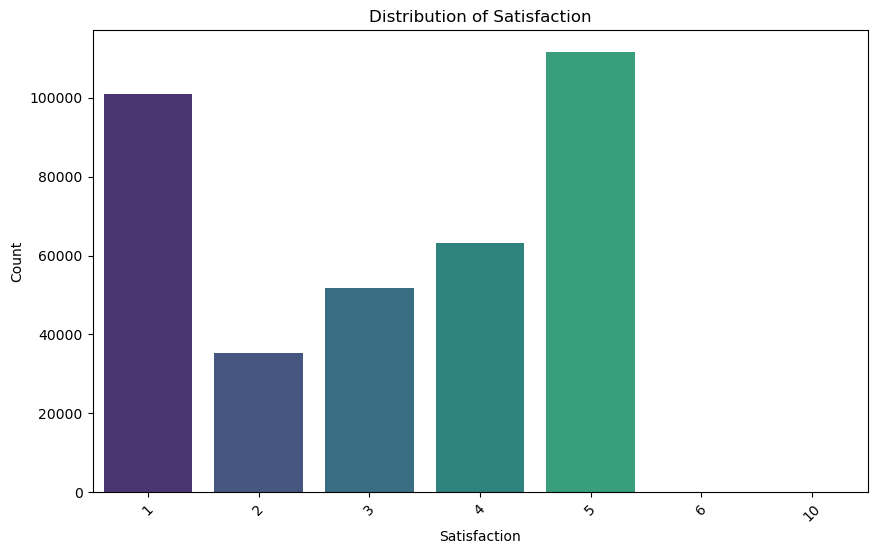

In [84]:
# Create a count plot for the "Age" column
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
sns.countplot(x='Satisfaction', data=data, palette='viridis')  # Create the count plot
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better readability
plt.title('Distribution of Satisfaction')
plt.xlabel('Satisfaction')
plt.ylabel('Count')

# Show the plot
plt.show()

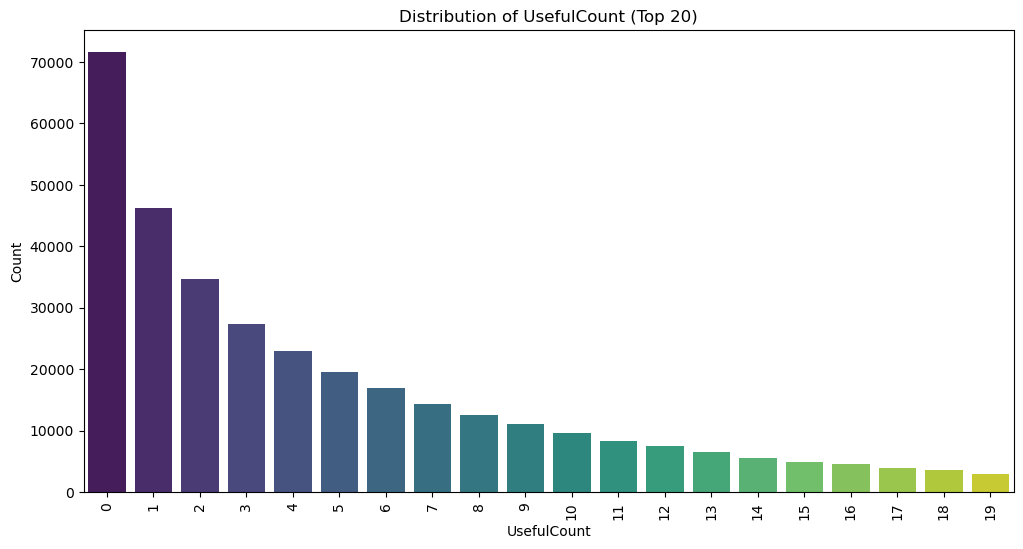

In [85]:
# Count the occurrences of each condition and select the top 20
condition_counts = data['UsefulCount'].value_counts().head(20)

# Create a count plot for the top 20 conditions
plt.figure(figsize=(12, 6))  # Set the figure size
sns.countplot(x='UsefulCount', data=data, order=condition_counts.index, palette='viridis')  # Create the count plot
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Distribution of UsefulCount (Top 20)')
plt.xlabel('UsefulCount')
plt.ylabel('Count')

# Show the plot
plt.show()

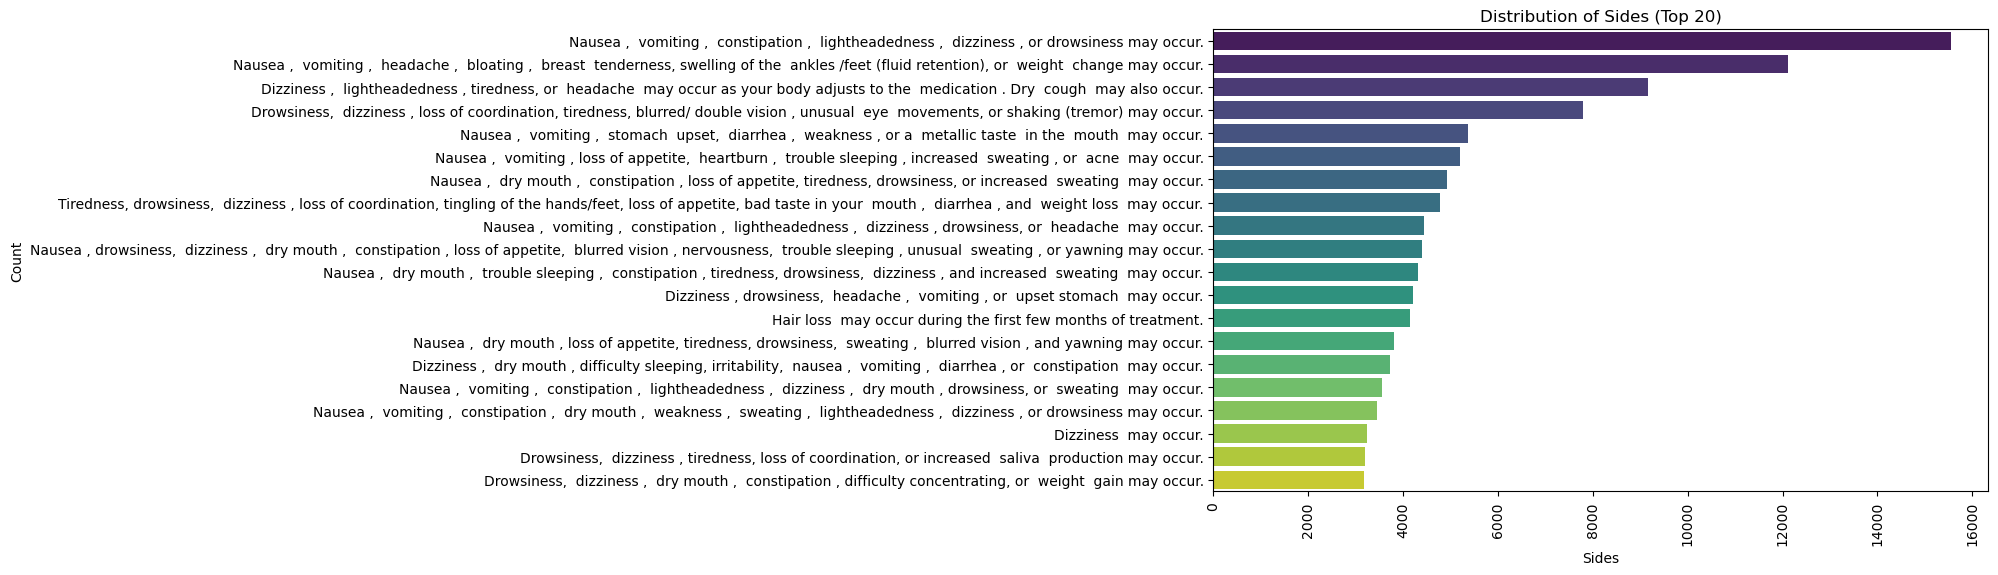

In [86]:
# Count the occurrences of each condition and select the top 20
condition_counts = data['Sides'].value_counts().head(20)

# Create a count plot for the top 20 conditions
plt.figure(figsize=(10, 6))  # Set the figure size
sns.countplot(y='Sides', data=data, order=condition_counts.index, palette='viridis')  # Create the count plot
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Distribution of Sides (Top 20)')
plt.xlabel('Sides')
plt.ylabel('Count')

# Show the plot
plt.show()

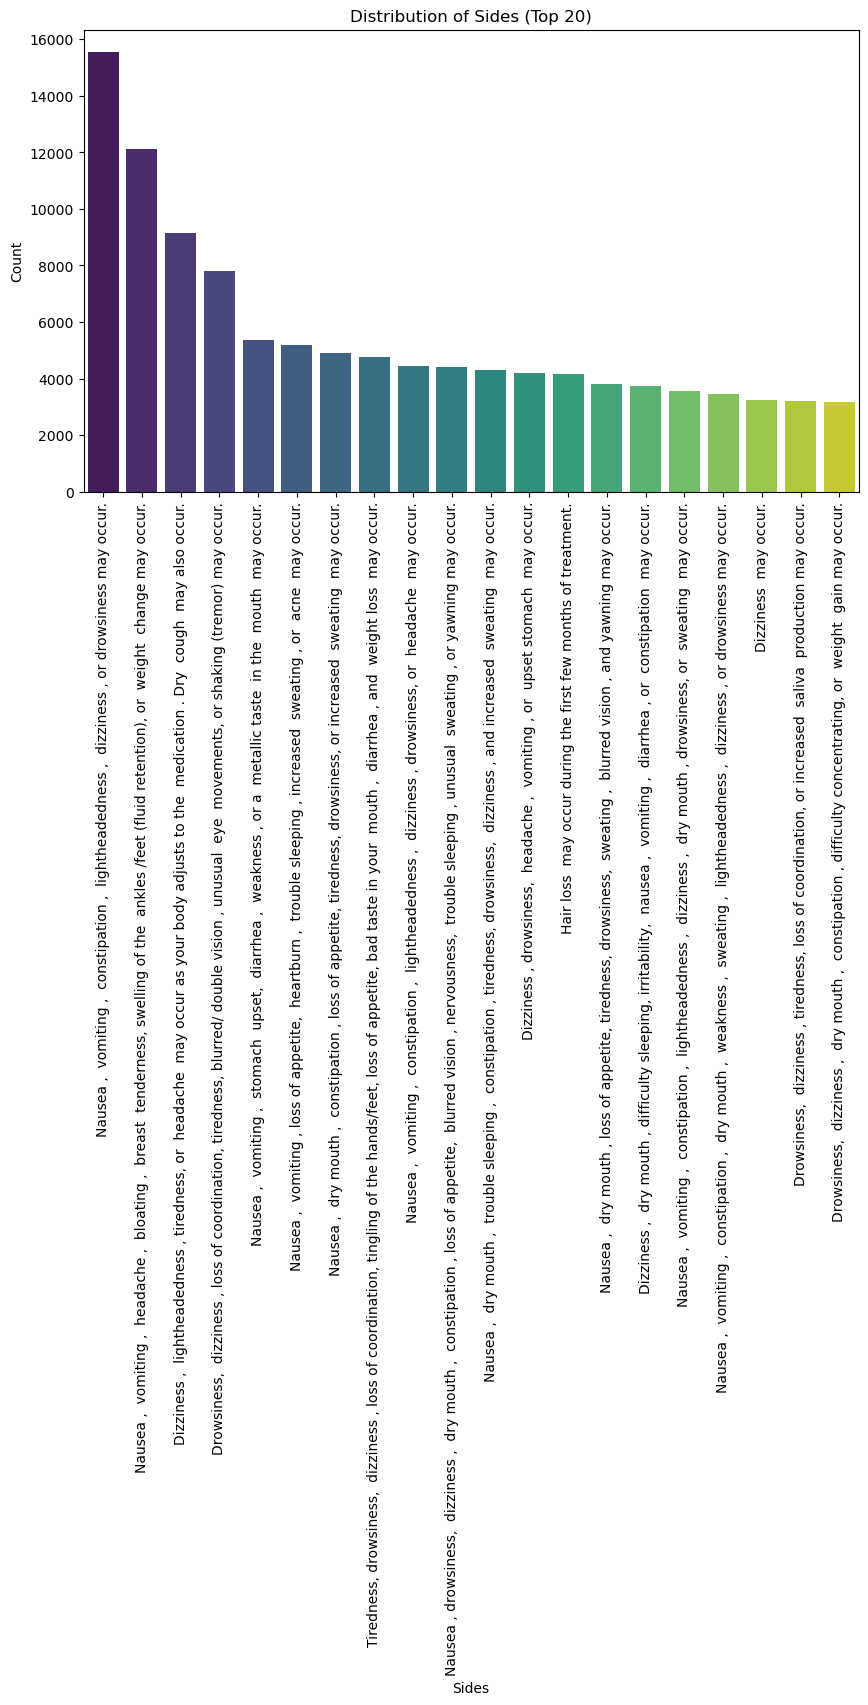

In [87]:
# Count the occurrences of each condition and select the top 20
condition_counts = data['Sides'].value_counts().head(20)

# Create a count plot for the top 20 conditions
plt.figure(figsize=(10, 6))  # Set the figure size
sns.countplot(x='Sides', data=data, order=condition_counts.index, palette='viridis')  # Create the count plot
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Distribution of Sides (Top 20)')
plt.xlabel('Sides')
plt.ylabel('Count')

# Show the plot
plt.show()

# Bi variate analysis

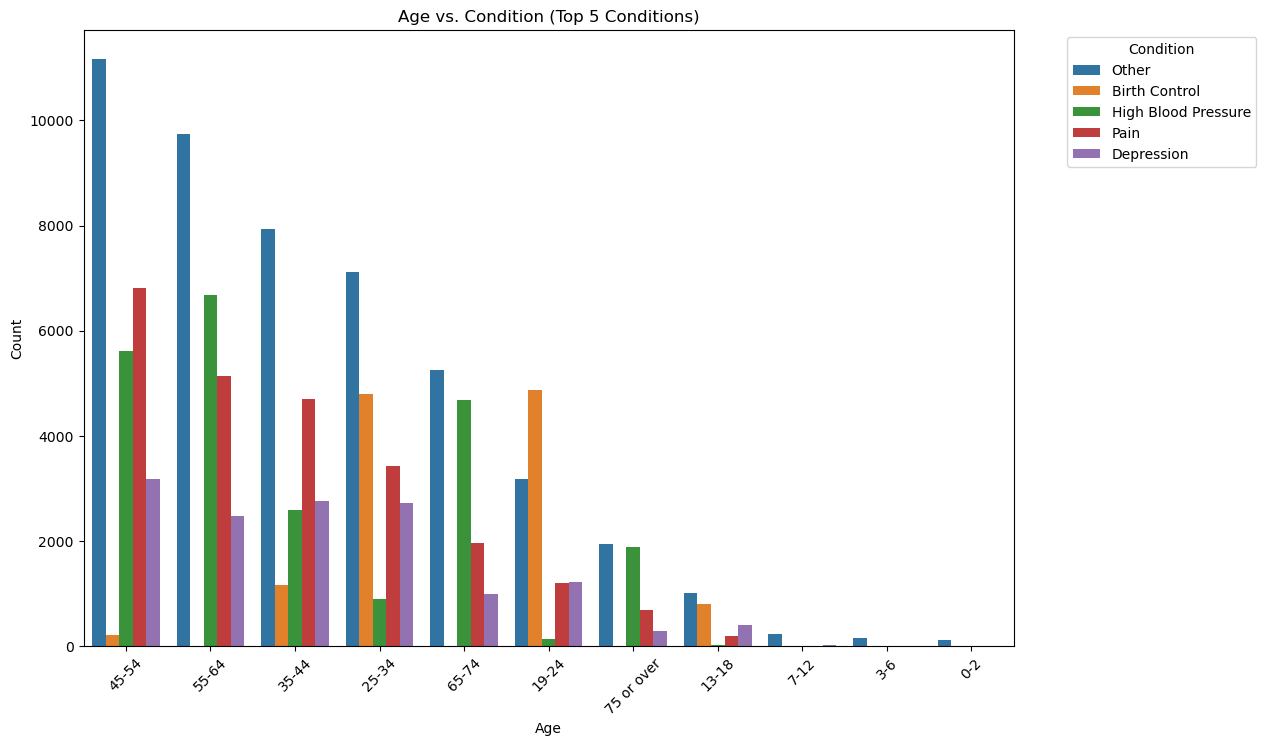

In [88]:
# Create a DataFrame containing the first 20 most common conditions
top_5_conditions = data['Condition'].value_counts().head(5).index
filtered_data = data[data['Condition'].isin(top_5_conditions)]

# Plot Age vs. Condition for the first 20 conditions
plt.figure(figsize=(12, 8))
sns.countplot(x='Age', hue='Condition', data=filtered_data, order=data['Age'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Age vs. Condition (Top 5 Conditions)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Condition', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

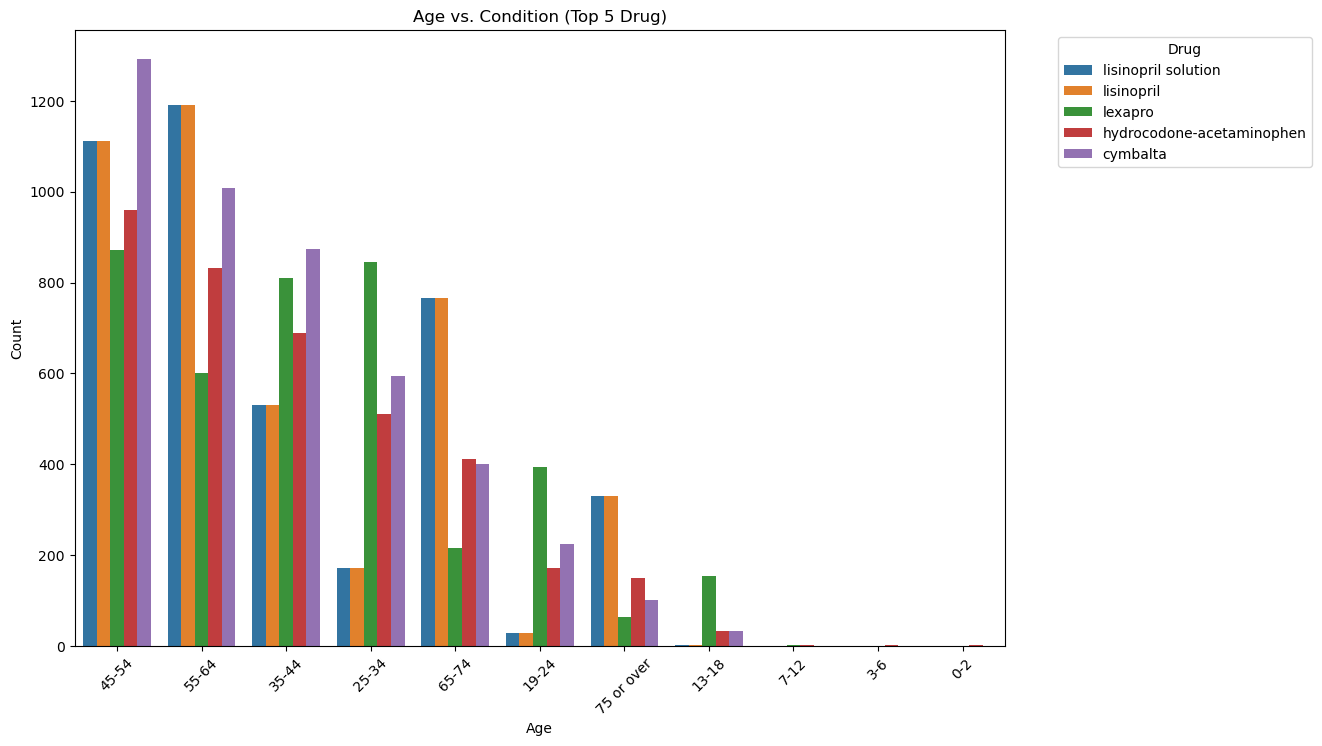

In [89]:
# Create a DataFrame containing the first 20 most common conditions
top_5_conditions = data['Drug'].value_counts().head(5).index
filtered_data = data[data['Drug'].isin(top_5_conditions)]

# Plot Age vs. Condition for the first 20 conditions
plt.figure(figsize=(12, 8))
sns.countplot(x='Age', hue='Drug', data=filtered_data, order=data['Age'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Age vs. Condition (Top 5 Drug)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Drug', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Text(0, 0.5, 'Ease of Use')

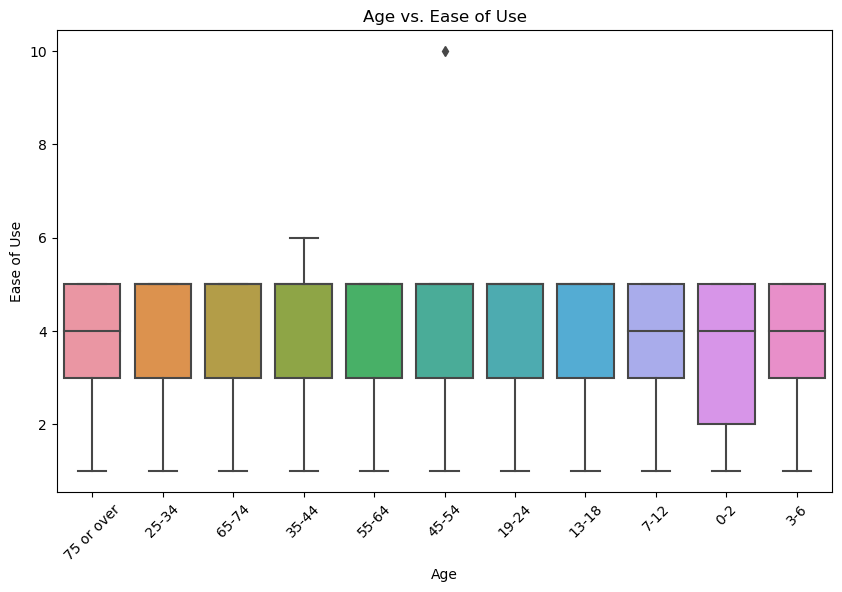

In [90]:
# 3. Age vs. Ease of Use
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='EaseofUse', data=data)
plt.xticks(rotation=45)
plt.title('Age vs. Ease of Use')
plt.xlabel('Age')
plt.ylabel('Ease of Use')

Text(0, 0.5, 'Effectiveness')

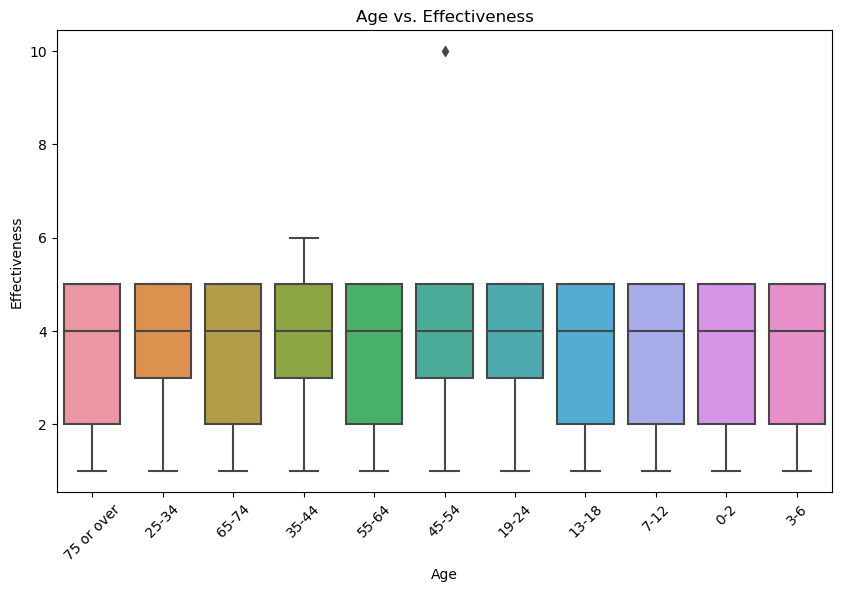

In [91]:
# 3. Age vs. Effectiveness
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='Effectiveness', data=data)
plt.xticks(rotation=45)
plt.title('Age vs. Effectiveness')
plt.xlabel('Age')
plt.ylabel('Effectiveness')

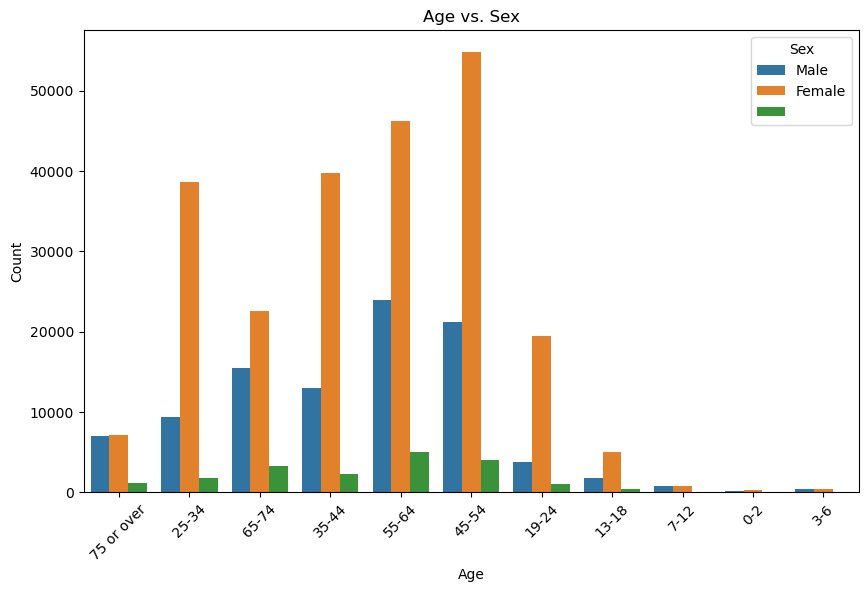

In [92]:
# 6. Age vs. Sex
plt.figure(figsize=(10, 6))
sns.countplot(x='Age', hue='Sex', data=data)
plt.xticks(rotation=45)
plt.title('Age vs. Sex')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Sex')

Text(0, 0.5, 'Satisfaction')

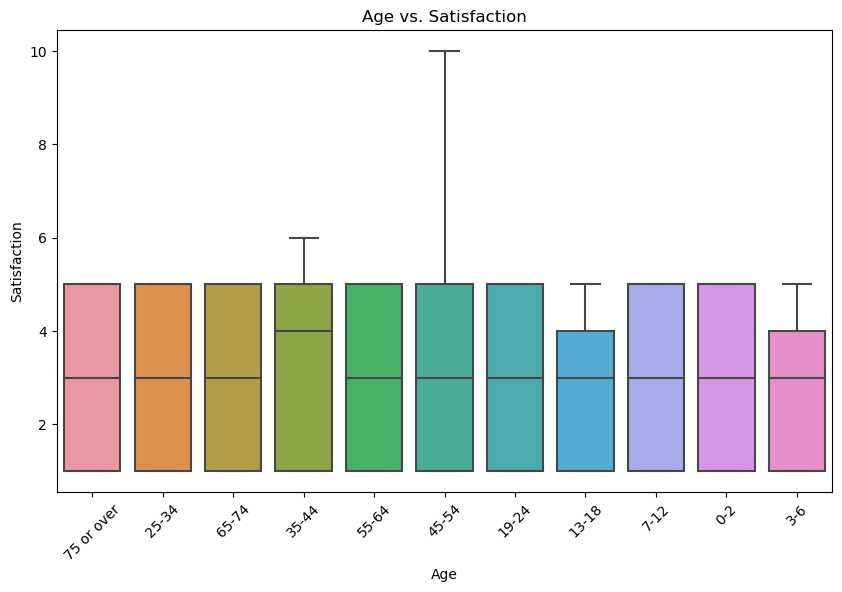

In [93]:
# 7. Age vs. Satisfaction
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='Satisfaction', data=data)
plt.xticks(rotation=45)
plt.title('Age vs. Satisfaction')
plt.xlabel('Age')
plt.ylabel('Satisfaction')

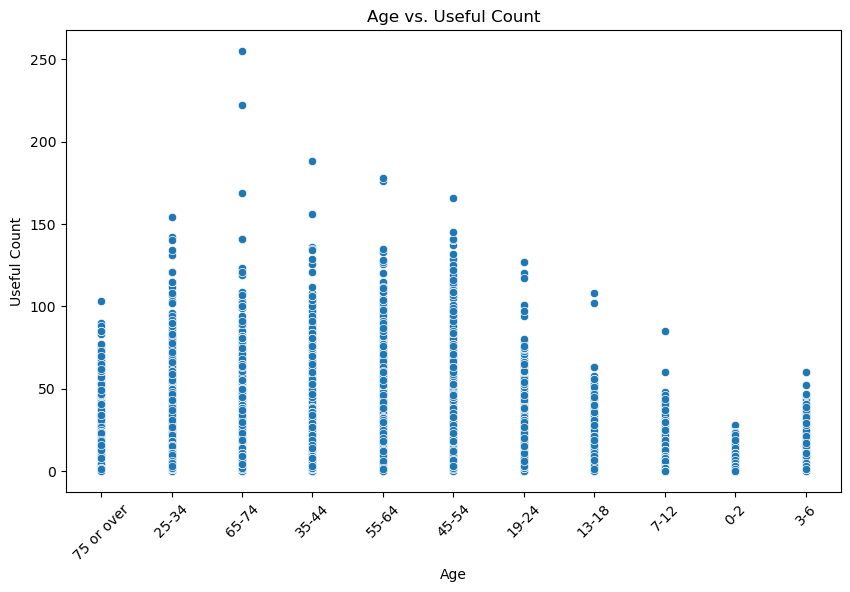

In [94]:
# 8. Age vs. Useful Count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='UsefulCount', data=data)
plt.xticks(rotation=45)
plt.title('Age vs. Useful Count')
plt.xlabel('Age')
plt.ylabel('Useful Count')

plt.show()


In [95]:
data.dtypes

Name             object
Race             object
Age              object
Condition        object
Date             object
Drug             object
DrugId            int64
EaseofUse         int64
Effectiveness     int64
Reviews          object
Satisfaction      int64
Sex              object
Sides            object
UsefulCount       int64
dtype: object

In [96]:
data.columns

Index(['Name', 'Race', 'Age', 'Condition', 'Date', 'Drug', 'DrugId',
       'EaseofUse', 'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount'],
      dtype='object')

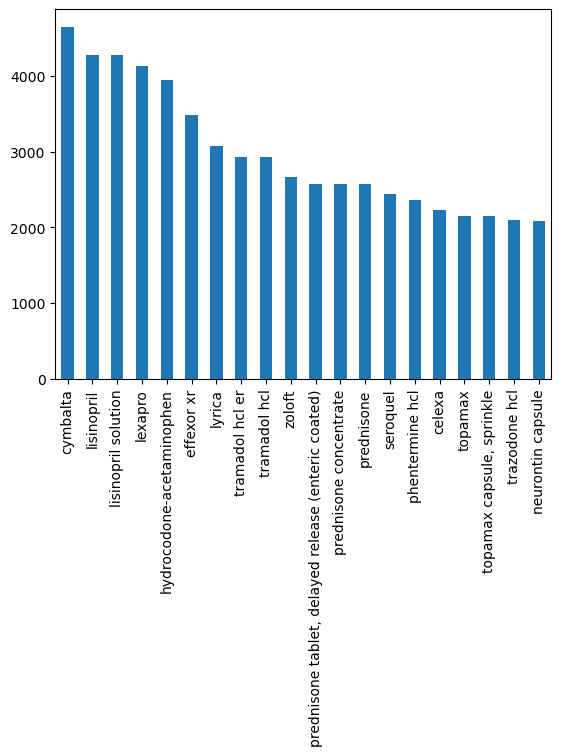

In [97]:
data['Drug'].value_counts().head(20).plot(kind='bar')
plt.rcParams['figure.figsize']=(10,7)
plt.show()

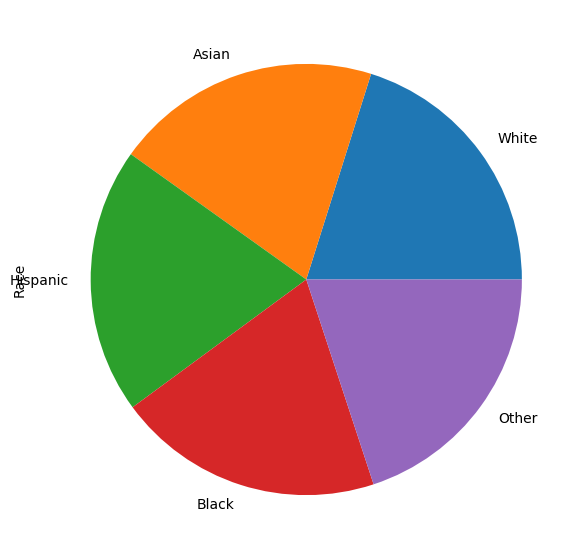

In [98]:
#let's check the effectiveness of the drugs
data['Race'].value_counts().head(15).plot(kind='pie')
plt.show()

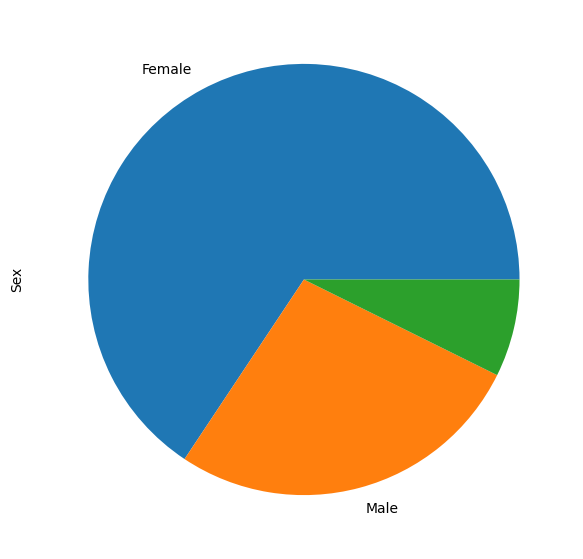

In [99]:
#let's check the effectiveness of the drugs
data['Sex'].value_counts().head(15).plot(kind='pie')
plt.show()

In [100]:
data.Sex.value_counts()

Female    238226
Male       98043
           26537
Name: Sex, dtype: int64

In [101]:
data['Sex'] = data['Sex'].replace(' ', np.nan)

In [102]:
data.isna().sum()

Name                 0
Race                 0
Age              12202
Condition           43
Date                 0
Drug                 0
DrugId               0
EaseofUse            0
Effectiveness        0
Reviews             37
Satisfaction         0
Sex              26537
Sides            17460
UsefulCount          0
dtype: int64

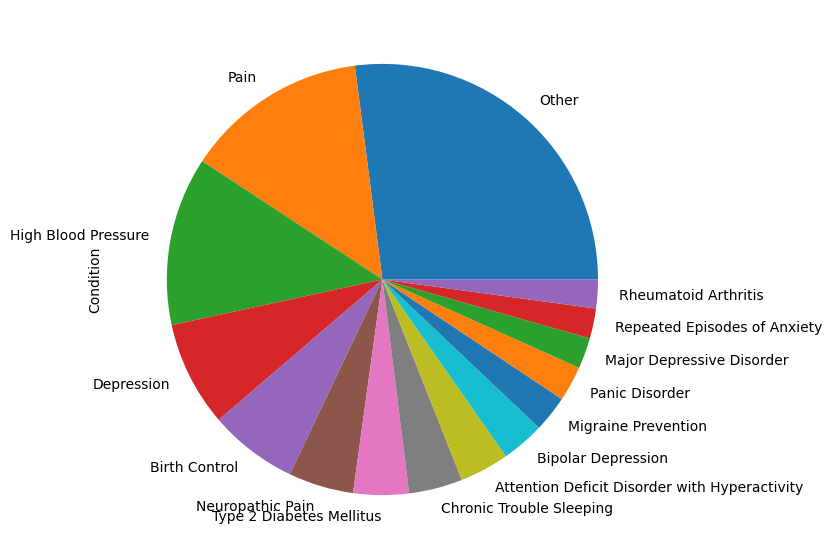

In [103]:
#let's check the effectiveness of the drugs
data['Condition'].value_counts().head(15).plot(kind='pie')
plt.show()

In [104]:
data.columns

Index(['Name', 'Race', 'Age', 'Condition', 'Date', 'Drug', 'DrugId',
       'EaseofUse', 'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount'],
      dtype='object')

In [105]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

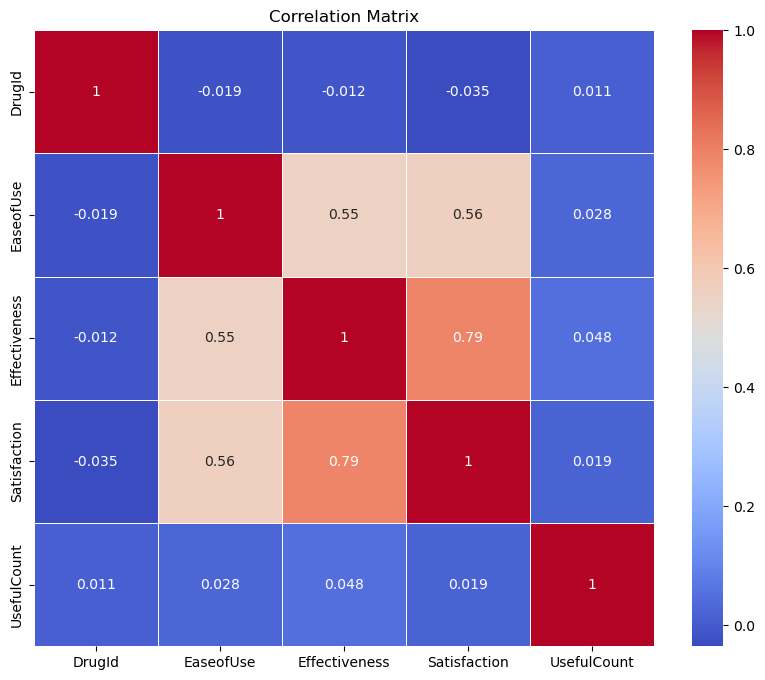

In [106]:

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

The columns effectiveness and Satisfaction are highly correlated.

In [107]:
data.isna().sum()

Name                 0
Race                 0
Age              12202
Condition           43
Date                 0
Drug                 0
DrugId               0
EaseofUse            0
Effectiveness        0
Reviews             37
Satisfaction         0
Sex              26537
Sides            17460
UsefulCount          0
dtype: int64

In [108]:
# Check for duplicate rows
duplicates = data.duplicated()

# Display the duplicate rows
duplicate_rows = data[duplicates]
print(duplicate_rows)


Empty DataFrame
Columns: [Name, Race, Age, Condition, Date, Drug, DrugId, EaseofUse, Effectiveness, Reviews, Satisfaction, Sex, Sides, UsefulCount]
Index: []


No duplicate rows

In [109]:
from scipy.stats import skew

# Calculate skewness of a numerical column (e.g., 'Satisfaction')
skewness = skew(data['Satisfaction'])
print(f"Skewness: {skewness}")


Skewness: -0.17798886944787987


In [110]:
# Assuming 'data' is your DataFrame
numerical_columns = data.select_dtypes(include=['number'])

# List the numerical column names
numerical_column_names = numerical_columns.columns.tolist()

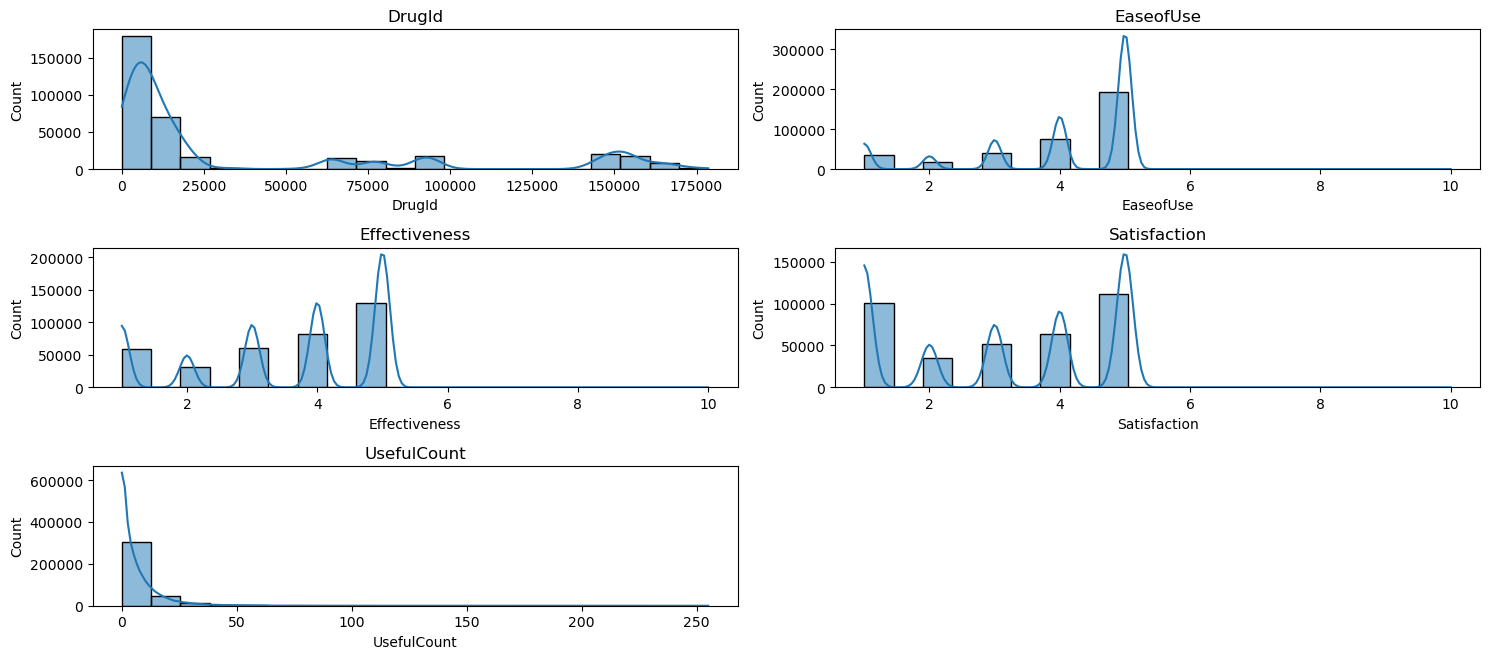

In [111]:
#Select numerical columns for univariate analysis

# Plot histograms for numerical variables
plt.figure(figsize=(15,15))
for i, column in enumerate(numerical_column_names):
    plt.subplot(7, 2, i + 1)
    sns.histplot(data[column], kde=True, bins=20)
    plt.title(column)
plt.tight_layout()
plt.show()

In [112]:
data.isna().sum()

Name                 0
Race                 0
Age              12202
Condition           43
Date                 0
Drug                 0
DrugId               0
EaseofUse            0
Effectiveness        0
Reviews             37
Satisfaction         0
Sex              26537
Sides            17460
UsefulCount          0
dtype: int64

In [113]:
data['Reviews'].fillna('No Reviews', inplace=True)

In [114]:
data.Drug.value_counts()

cymbalta                               4648
lisinopril                             4269
lisinopril solution                    4269
lexapro                                4134
hydrocodone-acetaminophen              3944
                                       ... 
sorbsan bandage                           1
sorbsan topical wound dressing 3" x       1
q-pap extra strength                      1
symax                                     1
vanadium granules                         1
Name: Drug, Length: 7093, dtype: int64

In [115]:
data['Drug'].nunique()

7093

In [116]:
#data['Sides'].fillna('No Sides', inplace=True)

In [117]:
data.isna().sum()

Name                 0
Race                 0
Age              12202
Condition           43
Date                 0
Drug                 0
DrugId               0
EaseofUse            0
Effectiveness        0
Reviews              0
Satisfaction         0
Sex              26537
Sides            17460
UsefulCount          0
dtype: int64

In [118]:
data['Sides'].fillna('Unknown', inplace=True)  

In [119]:
data['Sex'].fillna('Unknown', inplace=True)  

In [120]:
data['Condition'].fillna('Unknown', inplace=True)  

In [121]:
data.isna().sum()

Name                 0
Race                 0
Age              12202
Condition            0
Date                 0
Drug                 0
DrugId               0
EaseofUse            0
Effectiveness        0
Reviews              0
Satisfaction         0
Sex                  0
Sides                0
UsefulCount          0
dtype: int64

In [122]:
data['Age'] = data['Age'].fillna(data['Age'].mode().values[0])

In [123]:
data.isna().sum()

Name             0
Race             0
Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64